In [1]:
import os
import operator

import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 200
import polars as pl

import seaborn as sns
import matplotlib.pyplot as plt

from clickhouse_driver import Client

client = Client('localhost', database="thesistopologydb")

In [2]:
%%time 

exp_data_sql = """
SELECT
	ex.*
FROM
	experiment ex
"""
exp_df = client.query_dataframe(exp_data_sql)

exp_df["theoretical_client_to_proxy_rtt_ms"] = -1
exp_df["theoretical_proxy_to_server_rtt_ms"] = -1
exp_df["topology_orientation"] = ""

# Experiments with the word "topology" have high proxy-server RTT and low client-proxy RTT.
exp_df.loc[(exp_df["exp_id"].str.startswith("thesis_group_topology_")), "theoretical_client_to_proxy_rtt_ms"]  = 5  * 2
exp_df.loc[(exp_df["exp_id"].str.startswith("thesis_group_topology_")), "theoretical_proxy_to_server_rtt_ms"]  = 20 * 2
exp_df.loc[(exp_df["exp_id"].str.startswith("thesis_group_topology_")), "topology_orientation"]                = "flipped_topology"

# Experiments without the word "topology" have low proxy-server RTT and high client-proxy RTT.
exp_df.loc[~(exp_df["exp_id"].str.startswith("thesis_group_topology_")), "theoretical_client_to_proxy_rtt_ms"] = 20 * 2
exp_df.loc[~(exp_df["exp_id"].str.startswith("thesis_group_topology_")), "theoretical_proxy_to_server_rtt_ms"] = 5  * 2
exp_df.loc[~(exp_df["exp_id"].str.startswith("thesis_group_topology_")), "topology_orientation"]               = "standard_topology"

print(len(exp_df.exp_id.unique().tolist()))
print("\n".join(exp_df.exp_id.unique().tolist()))
print()
exp_df

32
thesis_group_controlling_proxy_rtt_8clients_withattacker_8000MBheap_50proxyconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https
thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_dtls_https
thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_3proxyconns_coap_https
thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_3proxyconns_dtls_https
thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_5proxyconns_coap_https
thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_5proxyconns_dtls_https
thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_7proxyconns_coap_https
thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_7proxyconns_dtls_https
thesis_group_controlling_proxy_rtt_8clients_withattacker_8000MBheap_10proxyconns_coa

exp_id  \
0   thesis_group_controlling_proxy_rtt_8clients_withattacker_8000MBheap_50proxyconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
1                                           thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
2                                           thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_dtls_https   
3                                           thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_3proxyconns_coap_https   
4                                           thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_3proxyconns_dtls_https   
5                                           thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_5proxyconns_coap_https   
6                                           thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_5proxyconns_dtls_https   
7                                           thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_7proxyconns_coap_https   
8                                           thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_7proxyconns_dtls_https   
9   thesis_group_controlling_proxy_rtt_8clients_withattacker_8000MBheap_10proxyconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
10  thesis_group_controlling_proxy_rtt_8clients_withattacker_8000MBheap_10proxyconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
11  thesis_group_controlling_proxy_rtt_8clients_withattacker_8000MBheap_30proxyconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
12  thesis_group_controlling_proxy_rtt_8clients_withattacker_8000MBheap_30proxyconns_dtls_https__140sec_proxy__30sec_attacker__120sec_client   
13  thesis_group_controlling_proxy_rtt_8clients_withattacker_8000MBheap_50proxyconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
14                                                                                      thesis_group_topology_8clients_noattacker_coap_https   
15                                                                                      thesis_group_topology_8clients_noattacker_dtls_https   
16                                                            thesis_group_topology_8clients_withattacker_8000MBheap_10proxyconns_coap_https   
17                                                            thesis_group_topology_8clients_withattacker_8000MBheap_10proxyconns_dtls_https   
18                                                             thesis_group_topology_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
19                                                             thesis_group_topology_8clients_withattacker_8000MBheap_1proxyconns_dtls_https   
20                                                            thesis_group_topology_8clients_withattacker_8000MBheap_30proxyconns_coap_https   
21                                                            thesis_group_topology_8clients_withattacker_8000MBheap_30proxyconns_dtls_https   
22                                                             thesis_group_topology_8clients_withattacker_8000MBheap_3proxyconns_coap_https   
23                                                             thesis_group_topology_8clients_withattacker_8000MBheap_3proxyconns_dtls_https   
24                                                             thesis_group_topology_8clients_withattacker_8000MBheap_5proxyconns_coap_https   
25                                                             thesis_group_topology_8clients_withattacker_8000MBheap_5proxyconns_dtls_https   
26                                                             thesis_group_topology_8clients_withattacker_8000MBheap_7proxyconns_coap_https   
27                                                             thesis_group_topology_8clients_withatta

In [3]:
%%time 

fetch_metadata_sql = """
SELECT
	n.node_name,
	dn.dnid,
	dn.node_id,
  dn.exp_id
FROM 
	deployed_node dn
	JOIN node n ON n.node_id = dn.node_id
"""

metadata_df = client.query_dataframe(fetch_metadata_sql)

dnid_map_node_name = dict()
dnid_map_exp_id = dict()
node_id_map_node_name = dict()

for record in metadata_df.to_dict(orient="records"):
  dnid = record["dnid"]
  node_id = record["node_id"]
  node_name = record["node_name"]
  exp_id = record["exp_id"]
  
  assert dnid not in dnid_map_node_name
  dnid_map_node_name[dnid] = node_name
  dnid_map_exp_id[dnid] = exp_id
  
  if node_id in node_id_map_node_name:
    assert node_id_map_node_name[node_id] == node_name
  else:
    node_id_map_node_name[node_id] = node_name
  
client_dnids = set(dnid for dnid, node_name in dnid_map_node_name.items() if node_name.startswith("client"))
attacker_dnids = set(dnid for dnid, node_name in dnid_map_node_name.items() if node_name.startswith("attacker"))
proxy_dnids = set(dnid for dnid, node_name in dnid_map_node_name.items() if node_name.startswith("proxy"))
originserver_dnids = set(dnid for dnid, node_name in dnid_map_node_name.items() if node_name.startswith("originserver"))

client_node_ids = set(node_id for node_id, node_name in node_id_map_node_name.items() if node_name.startswith("client"))
attacker_node_ids = set(node_id for node_id, node_name in node_id_map_node_name.items() if node_name.startswith("attacker"))
originserver_node_ids = set(node_id for node_id, node_name in node_id_map_node_name.items() if node_name.startswith("originserver"))

print(f"{client_dnids=}")
print(f"{attacker_dnids=}")
print(f"{proxy_dnids=}")
print(f"{client_node_ids=}")
print(f"{attacker_node_ids=}")

client_dnids={2, 3, 4, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 19, 20, 21, 26, 27, 28, 29, 30, 31, 32, 33, 38, 39, 40, 41, 42, 43, 44, 45, 50, 51, 52, 53, 54, 55, 56, 57, 62, 63, 64, 65, 66, 67, 68, 69, 74, 75, 76, 77, 78, 79, 80, 81, 86, 87, 88, 89, 90, 91, 92, 93, 98, 99, 100, 101, 102, 103, 104, 105, 110, 111, 112, 113, 114, 115, 116, 117, 122, 123, 124, 125, 126, 127, 128, 129, 134, 135, 136, 137, 138, 139, 140, 141, 146, 147, 148, 149, 150, 151, 152, 153, 158, 159, 160, 161, 162, 163, 164, 165, 170, 171, 172, 173, 174, 175, 176, 177, 182, 183, 184, 185, 186, 187, 188, 189, 194, 195, 196, 197, 198, 199, 200, 201, 206, 207, 208, 209, 210, 211, 212, 213, 218, 219, 220, 221, 222, 223, 224, 225, 230, 231, 232, 233, 234, 235, 236, 237, 242, 243, 244, 245, 246, 247, 248, 249, 254, 255, 256, 257, 258, 259, 260, 261, 266, 267, 268, 269, 270, 271, 272, 273, 278, 279, 280, 281, 282, 283, 284, 285, 290, 291, 292, 293, 294, 295, 296, 297, 302, 303, 304, 305, 306, 307, 308, 309, 314, 315, 316, 317, 

In [4]:
client_messages_sql = f"""
WITH client_sends AS (
  SELECT
    dn.exp_id AS exp_id,
    e.observe_timestamp AS observe_timestamp,
    e.trial AS trial,
    e.observer_id AS observer_id,
    e.message_marker AS message_marker,
    cm.coap_retransmitted AS coap_retransmitted
  FROM
    event e
    JOIN message m ON m.message_id = e.message_id
    JOIN coap_message cm ON cm.cmci = m.coap_message
    JOIN deployed_node dn ON dn.dnid = e.observer_id
  WHERE
    e.observer_id IN ({','.join(map(str, client_dnids))})   -- client dnids
    AND m.src_id IN ({','.join(map(str, client_node_ids))}) -- clients are senders (node ID)
), 

client_recvs AS (
  SELECT
    e.observe_timestamp AS observe_timestamp,
    e.trial AS trial,
    e.observer_id AS observer_id,
    e.message_marker AS message_marker,
    cm.coap_code AS response_code
  FROM
    event e
    JOIN message m ON m.message_id = e.message_id
    JOIN coap_message cm ON cm.cmci = m.coap_message
  WHERE
    e.observer_id IN ({','.join(map(str, client_dnids))})   -- client dnids
    AND m.dst_id IN ({','.join(map(str, client_node_ids))}) -- clients are receivers (node ID)
)

SELECT
  client_sends.exp_id AS exp_id,
  client_sends.trial AS trial,
  client_sends.observer_id AS observer_id,
  client_sends.message_marker AS message_marker,
  groupArray(client_recvs.response_code)[1] AS response_code,
  MIN(client_sends.observe_timestamp) AS send_time_sec,
  MIN(client_recvs.observe_timestamp) AS recv_time_sec,
  MIN(client_sends.observe_timestamp) AS first_send_time_sec,
  MAX(client_sends.observe_timestamp) AS last_send_time_sec,
  MIN(client_recvs.observe_timestamp) AS first_recv_time_sec,
  MAX(client_recvs.observe_timestamp) AS last_recv_time_sec,
  1e3 * (MIN(client_recvs.observe_timestamp) - MIN(client_sends.observe_timestamp)) AS rtt_ms_first_transmission,
  1e3 * (MIN(client_recvs.observe_timestamp) - MAX(client_sends.observe_timestamp)) AS rtt_ms_last_transmission,
  COUNT(client_sends.observe_timestamp) AS num_send_observations,
  COUNT(client_recvs.observe_timestamp) AS num_recv_observations,
  SUM(CASE WHEN client_sends.coap_retransmitted = true THEN 1 ELSE 0 END) AS num_retransmissions
FROM client_sends
  LEFT JOIN client_recvs USING (trial, observer_id, message_marker)
GROUP BY 
  exp_id, trial, observer_id, message_marker
ORDER BY
  exp_id, trial, observer_id, message_marker
"""

message_rtt_df = client.query_dataframe(client_messages_sql)
message_rtt_df.observer_id.replace(dnid_map_node_name, inplace=True)

message_rtt_df["successful_message"] = False
message_rtt_df.loc[(message_rtt_df["response_code"] == "content"), "successful_message"] = True

print(message_rtt_df["response_code"].unique())

message_rtt_df = message_rtt_df.merge(exp_df, on="exp_id", how="left")

# Due to left join, we need to eliminate lines that
# have negative RTT, so we NaN them.
message_rtt_df.loc[
  (message_rtt_df["rtt_ms_first_transmission"] < 0)
  | (message_rtt_df["rtt_ms_last_transmission"] < 0)
  ,
  ["rtt_ms_first_transmission", "rtt_ms_last_transmission"]
] = np.nan

message_rtt_df

['content' 'bad_gateway' '']


exp_id  \
0        thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
1        thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
2        thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
3        thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
4        thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
...                                                                                                   ...   
1876024                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
1876025                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
1876026                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
1876027                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
1876028                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   

         trial observer_id  message_marker response_code  send_time_sec  \
0            1     client1               1       content       0.000000   
1            1     client1               2       content       0.359698   
2            1     client1               3       content       0.421618   
3            1     client1               4       content       0.483229   
4            1     client1               5       content       0.541968   
...        ...         ...             ...           ...            ...   
1876024      5     client8           17712       content     125.844201   
1876025      5     client8           17713       content     125.897814   
1876026      5     client8           17714       content     125.951450   
1876027      5     client8           17715       content     126.004981   
1876028      5     client8           17716                   126.058800   

         recv_time_sec  first_send_time_sec  last_send_time_sec  \
0             0.343467             0.000000            0.000000   
1             0.419168             0.359698            0.359698   
2             0.480902             0.421618            0.421618   
3             0.539894             0.483229            0.483229   
4             0.597902             0.541968            0.541968   
...                ...                  ...                 ...   
1876024     125.897057           125.844201          125.844201   
1876025     125.950548           125.897814          125.897814   
1876026     126.004210           125.951450          125.951450   
1876027     126.058008           126.004981          126.004981   
1876028       0.000000           126.058800          126.058800   

         first_recv_time_sec  ...  max_retries  keep_alive_duration  \
0                   0.343467  ...            4                  150   
1                   0.419168  ...            4                  150   
2                   0.480902  ...            4                  150   
3                   0.539894  ...            4                  150   
4                   0.597902  ...            4                  150   
...                      ...  ...          ...                  ...   
1876024           125.897057  ...            4                  150   
1876025           125.950548  ...            4                  150   
1876026           126.004210  ...            4                  150   
1876027           126.058008  ...            4                  150   
1876028             0.000000  ...            4                  150   

         request_retry_interval  reuse_connections  run_proxy_with_dtls  \
0                             1               True                False   
1                             1               True                False   
2     

In [5]:
%%time

client_recvs_sql = f"""
WITH client_recvs AS (
  SELECT
    dn.exp_id AS exp_id,
    e.observe_timestamp AS observe_timestamp,
    e.trial AS trial,
    e.observer_id AS observer_id,
    e.message_marker AS message_marker,
    cm.coap_code AS response_code
  FROM
    event e
    JOIN message m ON m.message_id = e.message_id
    JOIN coap_message cm ON cm.cmci = m.coap_message
    JOIN deployed_node dn ON dn.dnid = e.observer_id
  WHERE
    e.observer_id IN ({','.join(map(str, client_dnids))})   -- client dnids
    AND m.dst_id IN ({','.join(map(str, client_node_ids))}) -- clients are receivers (node ID)
)

SELECT * FROM client_recvs
ORDER BY exp_id, trial, observer_id, message_marker
"""

client_recvs_df = client.query_dataframe(client_recvs_sql)
client_recvs_df.observer_id.replace(dnid_map_node_name, inplace=True)

client_recvs_df["successful_message"] = False
client_recvs_df.loc[(client_recvs_df["response_code"] == "content"), "successful_message"] = True

print(client_recvs_df["response_code"].unique())

client_recvs_df

['content' 'bad_gateway']
CPU times: user 27.6 s, sys: 3.94 s, total: 31.6 s
Wall time: 32.6 s


exp_id  \
0        thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
1        thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
2        thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
3        thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
4        thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
...                                                                                                   ...   
1874778                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
1874779                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
1874780                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
1874781                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
1874782                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   

         observe_timestamp  trial observer_id  message_marker response_code  \
0                 0.343467      1     client1               1       content   
1                 0.419168      1     client1               2       content   
2                 0.480902      1     client1               3       content   
3                 0.539894      1     client1               4       content   
4                 0.597902      1     client1               5       content   
...                    ...    ...         ...             ...           ...   
1874778         125.843483      5     client8           17711       content   
1874779         125.897057      5     client8           17712       content   
1874780         125.950548      5     client8           17713       content   
1874781         126.004210      5     client8           17714       content   
1874782         126.058008      5     client8           17715       content   

         successful_message  
0                      True  
1                      True  
2                      True  
3                      True  
4                      True  
...                     ...  
1874778                True  
1874779                True  
1874780                True  
1874781                True  
1874782                True  

[1874783 rows x 7 columns]

In [6]:
%%time

client_sends_sql = f"""
WITH client_sends AS (
  SELECT
    dn.exp_id AS exp_id,
    e.observe_timestamp AS observe_timestamp,
    e.trial AS trial,
    e.observer_id AS observer_id,
    e.message_marker AS message_marker,
    cm.coap_retransmitted AS coap_retransmitted
  FROM
    event e
    JOIN message m ON m.message_id = e.message_id
    JOIN coap_message cm ON cm.cmci = m.coap_message
    JOIN deployed_node dn ON dn.dnid = e.observer_id
  WHERE
    e.observer_id IN ({','.join(map(str, client_dnids))})   -- client dnids
    AND m.src_id IN ({','.join(map(str, client_node_ids))}) -- clients are senders (node ID)
)

SELECT * FROM client_sends
ORDER BY exp_id, trial, observer_id, message_marker
"""

client_sends_df = client.query_dataframe(client_sends_sql)
client_sends_df.observer_id.replace(dnid_map_node_name, inplace=True)

client_sends_df

CPU times: user 27.3 s, sys: 3.07 s, total: 30.3 s
Wall time: 31.3 s


exp_id  \
0        thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
1        thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
2        thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
3        thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
4        thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
...                                                                                                   ...   
1883495                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
1883496                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
1883497                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
1883498                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
1883499                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   

         observe_timestamp  trial observer_id  message_marker  \
0                 0.000000      1     client1               1   
1                 0.359698      1     client1               2   
2                 0.421618      1     client1               3   
3                 0.483229      1     client1               4   
4                 0.541968      1     client1               5   
...                    ...    ...         ...             ...   
1883495         125.844201      5     client8           17712   
1883496         125.897814      5     client8           17713   
1883497         125.951450      5     client8           17714   
1883498         126.004981      5     client8           17715   
1883499         126.058800      5     client8           17716   

         coap_retransmitted  
0                     False  
1                     False  
2                     False  
3                     False  
4                     False  
...                     ...  
1883495               False  
1883496               False  
1883497               False  
1883498               False  
1883499               False  

[1883500 rows x 6 columns]

In [7]:
%%time

metric_usage_sql = f"""
SELECT
	dn.exp_id,
	nm.trial,
	nm.observer_id,
	nm.metric_type,
	AVG(nm.metric_value) AS avg_value,
	MIN(nm.metric_value) AS min_value,
	MAX(nm.metric_value) AS max_value
FROM
	node_metric nm
	JOIN deployed_node dn ON dn.dnid = nm.observer_id
GROUP BY
	dn.exp_id, nm.trial, nm.observer_id, nm.metric_type
ORDER BY
	dn.exp_id, nm.trial, nm.metric_type, nm.observer_id
"""

metric_df = client.query_dataframe(metric_usage_sql)

metric_df.observer_id.replace(dnid_map_node_name, inplace=True)

metric_df = metric_df.merge(exp_df, on="exp_id", how="left")

metric_df

CPU times: user 60.5 ms, sys: 0 ns, total: 60.5 ms
Wall time: 182 ms


exp_id  \
0    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
1    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
2    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
3    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
4    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
..                                                                                                ...   
635                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
636                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
637                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
638                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
639                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   

     trial   observer_id         metric_type    avg_value  min_value  \
0        1  originserver     cpu_utilization     1.193571        0.4   
1        1         proxy     cpu_utilization    13.207857        0.5   
2        1  originserver  memory_utilization   269.396694      257.0   
3        1         proxy  memory_utilization  3461.143095      252.0   
4        2  originserver     cpu_utilization     1.154286        0.4   
..     ...           ...                 ...          ...        ...   
635      4         proxy  memory_utilization   470.439669      249.0   
636      5  originserver     cpu_utilization     1.566429        0.4   
637      5         proxy     cpu_utilization     3.360714        0.4   
638      5  originserver  memory_utilization   298.502479      285.0   
639      5         proxy  memory_utilization   470.257851      250.0   

     max_value attacker_rate  server_connections  max_keep_alive_requests  \
0          9.5       100mbps                 256                        0   
1         79.9       100mbps                 256                        0   
2        272.0       100mbps                 256                        0   
3       5686.0       100mbps                 256                        0   
4          9.4       100mbps                 256                        0   
..         ...           ...                 ...                      ...   
635      505.0         0mbps                 256                        0   
636        9.3         0mbps                 256                        0   
637       27.4         0mbps                 256                        0   
638      300.0         0mbps                 256                        0   
639      505.0         0mbps                 256                        0   

     ...  max_retries  keep_alive_duration  request_retry_interval  \
0    ...            4                  150                       1   
1    ...            4                  150                       1   
2    ...            4                  150                       1   
3    ...            4                  150                       1   
4    ...            4                  150                       1   
..   ...          ...                  ...                     ...   
635  ...            4                  150                       1   
636  ...            4                  150                       1   
637  ...            4                  150                       1   
638  ...            4                  150                       1   
639  ...            4                  150                       1   

     reuse_connections  run_proxy_with_dtls  run_proxy_with_https  \
0                 True                False                  True   
1                 True                False                  True

In [8]:
%%time

client_rps_df = (
  message_rtt_df
  .groupby(by=["exp_id", "trial", "observer_id"])
  .aggregate(
    num_messages=("successful_message", "count"),
    num_successful_messages=("successful_message", "sum"),
    mean_rps=("successful_message", "sum"),
    max_num_retransmissions=("num_retransmissions", "max"),
    total_num_retransmissions=("num_retransmissions", "sum"),
    stddev_rtt_ms=("rtt_ms_first_transmission", "std"),
    min_rtt_ms=("rtt_ms_first_transmission", "min"),
    median_rtt_ms=("rtt_ms_first_transmission", "median"),
    mean_rtt_ms=("rtt_ms_first_transmission", "mean"),
    max_rtt_ms=("rtt_ms_first_transmission", "max"),
    rtt_ms_p0=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.00)),
    rtt_ms_p25=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.25)),
    rtt_ms_p50=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.50)),
    rtt_ms_p75=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.75)),
    rtt_ms_p90=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.90)),
    rtt_ms_p99=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.99)),
    rtt_ms_p100=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=1.00)),
    first_active_time=("first_send_time_sec", "min"),
    last_active_time=("last_recv_time_sec", "max"),
  )
  .reset_index()
)
assert client_rps_df["min_rtt_ms"].eq(client_rps_df["rtt_ms_p0"]).all()
assert client_rps_df["median_rtt_ms"].eq(client_rps_df["rtt_ms_p50"]).all()
assert client_rps_df["max_rtt_ms"].eq(client_rps_df["rtt_ms_p100"]).all()

client_rps_df["num_failed_messages"] = client_rps_df["num_messages"] - client_rps_df["num_successful_messages"]
client_rps_df["average_rps"] = client_rps_df["num_successful_messages"] / (client_rps_df["last_active_time"] - client_rps_df["first_active_time"])

client_rps_df = client_rps_df.merge(exp_df, on="exp_id")
bool_col_replacement = {
  "run_proxy_with_dtls": {True: "dtls", False: "coap"},
  "run_proxy_with_https": {True: "https", False: "http"},
  "reuse_connections": {True: "reuse-connections", False: "no-connection-reuse"},
  "run_attacker": {True: "attacker", False: "no-attacker"},
}
client_rps_df.replace(bool_col_replacement, inplace=True)

client_rps_df["mean_rps"] /= client_rps_df["client_duration"]

client_rps_df[["exp_id", "trial", "observer_id", "mean_rps"]]

client_rps_df

CPU times: user 8.75 s, sys: 22 ms, total: 8.77 s
Wall time: 8.78 s


exp_id  \
0     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
1     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
2     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
3     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
4     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
...                                                                                                ...   
1275                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
1276                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
1277                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
1278                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
1279                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   

      trial observer_id  num_messages  num_successful_messages   mean_rps  \
0         1     client1           961                      954   7.950000   
1         1     client2           959                      953   7.941667   
2         1     client3           957                      950   7.916667   
3         1     client4           955                      949   7.908333   
4         1     client5           956                      950   7.916667   
...     ...         ...           ...                      ...        ...   
1275      5     client4          2210                     2209  18.408333   
1276      5     client5          2210                     2209  18.408333   
1277      5     client6          2212                     2211  18.425000   
1278      5     client7          2212                     2211  18.425000   
1279      5     client8          2213                     2212  18.433333   

      max_num_retransmissions  total_num_retransmissions  stddev_rtt_ms  \
0                           2                          7     435.641562   
1                           2                          8     432.073531   
2                           2                          7     453.320769   
3                           2                          7     467.512099   
4                           2                          8     463.294291   
...                       ...                        ...            ...   
1275                        0                          0       1.152012   
1276                        0                          0       0.542640   
1277                        0                          0       0.456249   
1278                        0                          0       0.789627   
1279                        0                          0       0.474967   

      min_rtt_ms  ...  max_retries  keep_alive_duration  \
0      54.063082  ...            4                  150   
1      53.923130  ...            4                  150   
2      53.842068  ...            4                  150   
3      53.938866  ...            4                  150   
4      52.661896  ...            4                  150   
...          ...  ...          ...                  ...   
1275   51.818132  ...            4                  150   
1276   51.759958  ...            4                  150   
1277   51.796913  ...            4                  150   
1278   51.720142  ...            4                  150   
1279   51.735878  ...            4                  150   

      request_retry_interval  reuse_connections  run_proxy_with_dtls  \
0                          1  reuse-connections                 coap   
1                          1  reuse-connections                 coap   
2                          1  reuse-connections                 coap   


In [9]:
### At this point, we generate figures for the paper

plt.rcParams['figure.dpi']  = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['font.size']        = '18'
plt.rcParams['lines.linewidth']  = 3
plt.rcParams['lines.markersize'] = 9

value_map_replacement = {
  "run_proxy_with_dtls": {
    "coap": "CoAP",
    False: "CoAP",
    "dtls": "CoAPS",
    True: "CoAPS",
  },
  "reuse_connections": {
    "reuse-connections": "Reuse Connections",
    True: "Reuse Connections",
    "no-connection-reuse": "No Connection Reuse",
    False: "No Connection Reuse",
  },
  "topology_orientation": {
    "flipped_topology": "Flipped Topology",
    "standard_topology": "Standard Topology",
  },
  "run_attacker": {
    "attacker": "With Attacker",
    True: "With Attacker",
    "no-attacker": "Without Attacker",
    False: "Without Attacker",
  },
  "response_code": {
    "bad_gateway": "Bad Gateway",
    "content": "Content",
  },
}

client_rps_df.replace(value_map_replacement, inplace=True)

metric_df.replace(value_map_replacement, inplace=True)

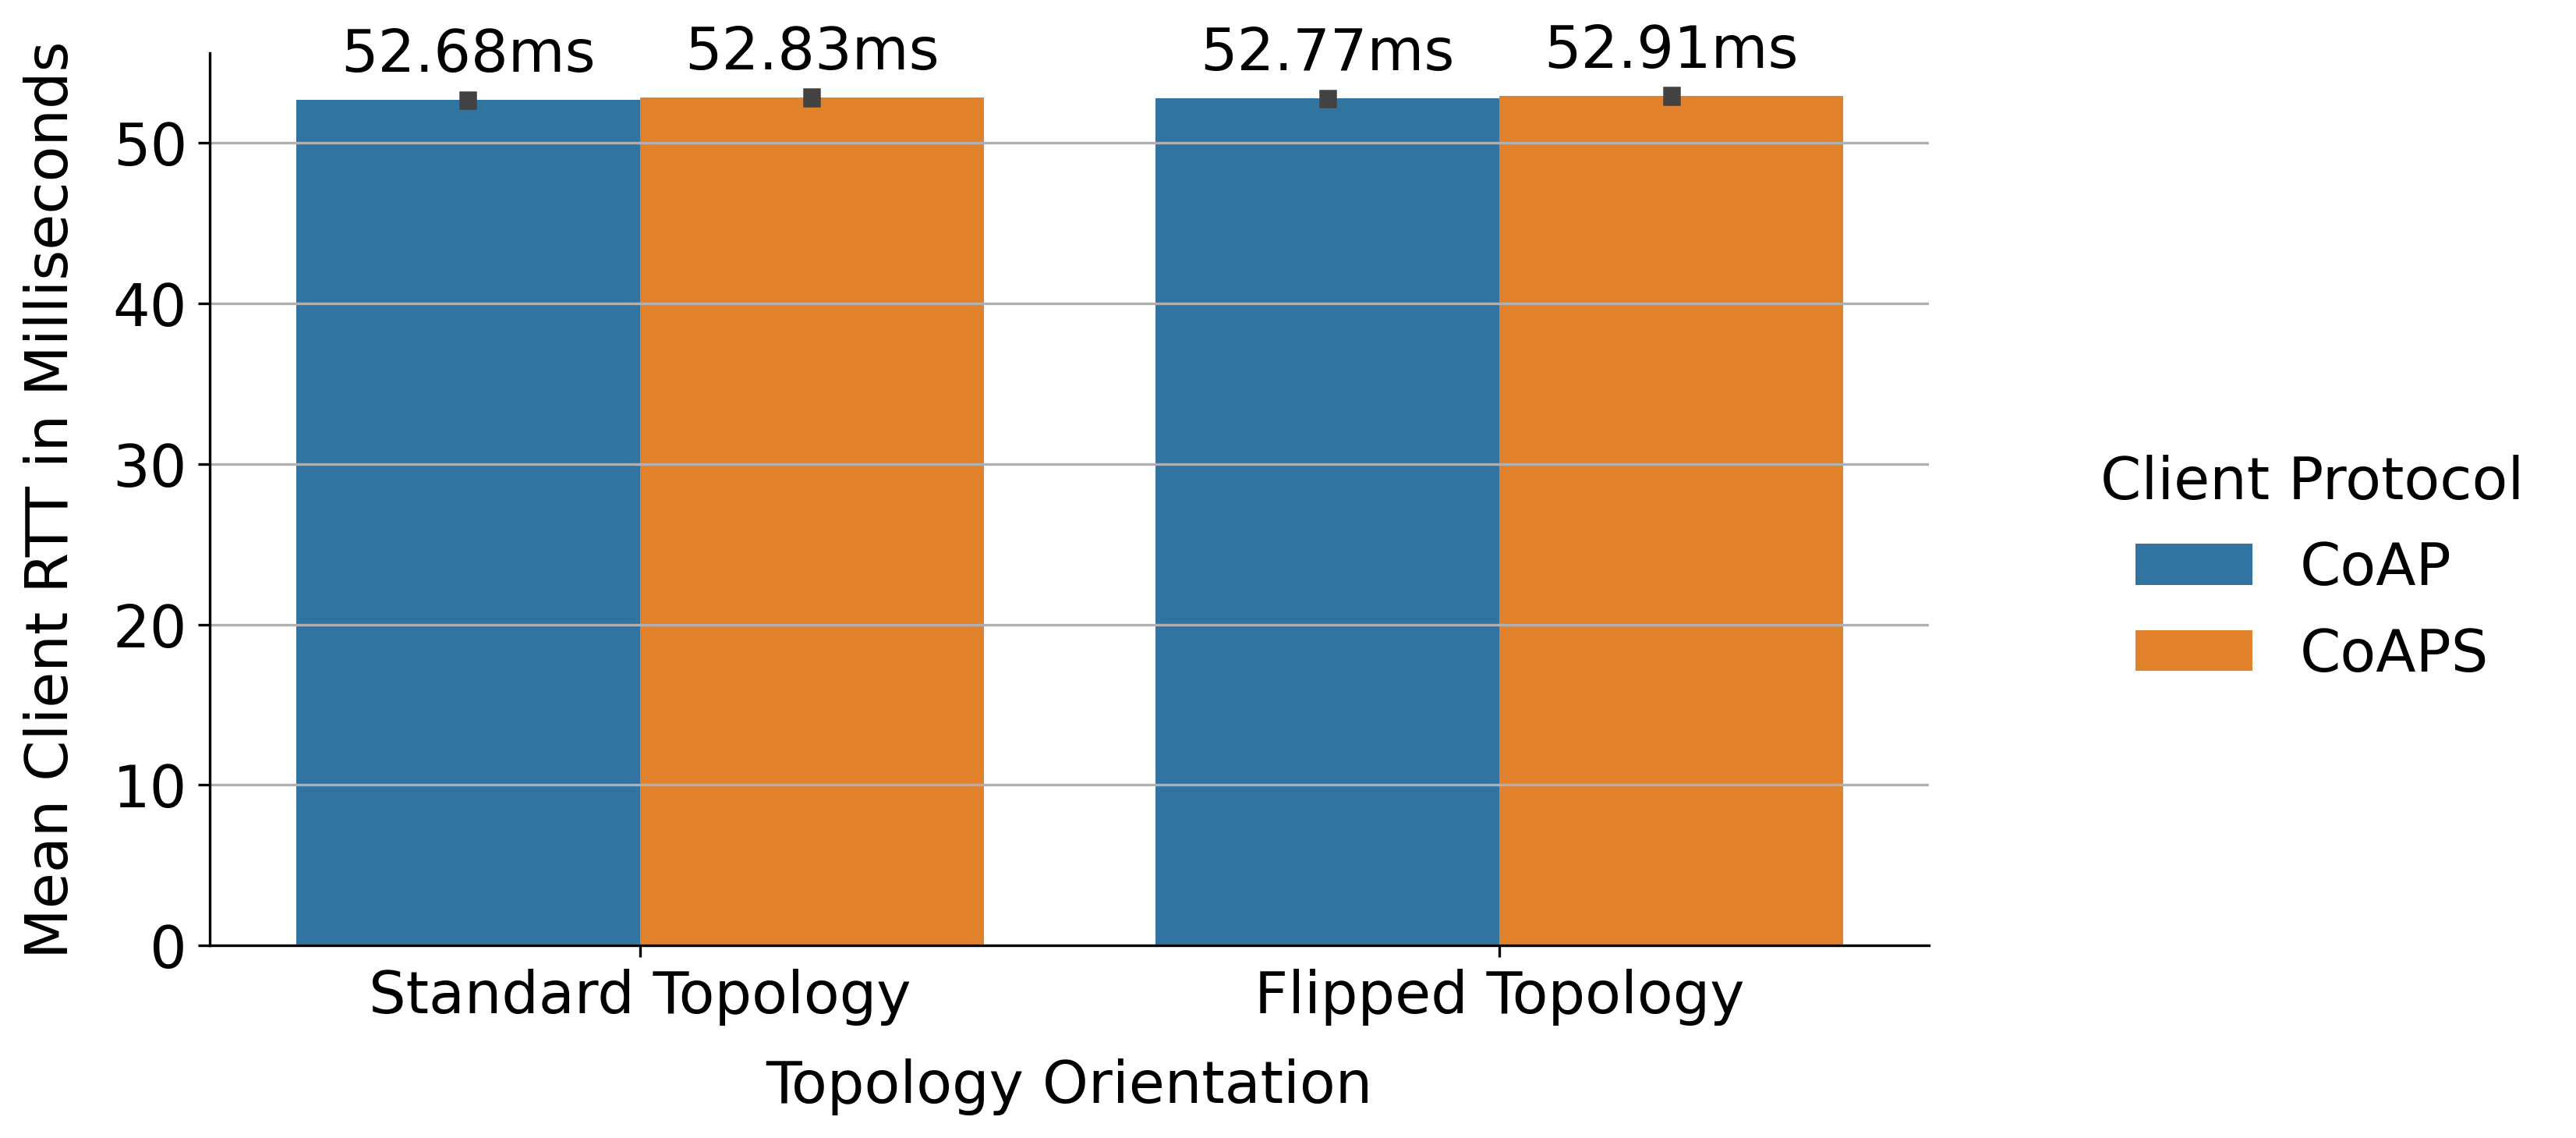

CPU times: user 1.03 s, sys: 153 ms, total: 1.19 s
Wall time: 869 ms


exp_id  trial  \
560              thesis_group_topology_8clients_noattacker_coap_https      1   
561              thesis_group_topology_8clients_noattacker_coap_https      1   
562              thesis_group_topology_8clients_noattacker_coap_https      1   
563              thesis_group_topology_8clients_noattacker_coap_https      1   
564              thesis_group_topology_8clients_noattacker_coap_https      1   
...                                                               ...    ...   
1275  updated_thesis_group_num_clients_8clients_noattacker_dtls_https      5   
1276  updated_thesis_group_num_clients_8clients_noattacker_dtls_https      5   
1277  updated_thesis_group_num_clients_8clients_noattacker_dtls_https      5   
1278  updated_thesis_group_num_clients_8clients_noattacker_dtls_https      5   
1279  updated_thesis_group_num_clients_8clients_noattacker_dtls_https      5   

     observer_id  num_messages  num_successful_messages   mean_rps  \
560      client1          2173                     2172  18.100000   
561      client2          2179                     2178  18.150000   
562      client3          2180                     2179  18.158333   
563      client4          2182                     2181  18.175000   
564      client5          2185                     2184  18.200000   
...          ...           ...                      ...        ...   
1275     client4          2210                     2209  18.408333   
1276     client5          2210                     2209  18.408333   
1277     client6          2212                     2211  18.425000   
1278     client7          2212                     2211  18.425000   
1279     client8          2213                     2212  18.433333   

      max_num_retransmissions  total_num_retransmissions  stddev_rtt_ms  \
560                         0                          0      10.717748   
561                         0                          0       2.890283   
562                         0                          0       2.982870   
563                         0                          0       2.796166   
564                         0                          0       0.412289   
...                       ...                        ...            ...   
1275                        0                          0       1.152012   
1276                        0                          0       0.542640   
1277                        0                          0       0.456249   
1278                        0                          0       0.789627   
1279                        0                          0       0.474967   

      min_rtt_ms  ...  max_retries  keep_alive_duration  \
560    51.942110  ...            4                  150   
561    51.883936  ...            4                  150   
562    52.009106  ...            4                  150   
563    51.961184  ...            4                  150   
564    51.916122  ...            4                  150   
...          ...  ...          ...                  ...   
1275   51.818132  ...            4                  150   
1276   51.759958  ...            4                  150   
1277   51.796913  ...            4                  150   
1278   51.720142  ...            4                  150   
1279   51.735878  ...            4                  150   

      request_retry_interval  reuse_connections  run_proxy_with_dtls  \
560                        1  Reuse Connections                 CoAP   
561                        1  Reuse Connections                 CoAP   
562                        1  Reuse Connections                 CoAP   
563                        1  Reuse Connections                 CoAP   
564                        1  Reuse Connections                 CoAP   
...                      ...                ...                  ...   
1275                       1  Reuse Connections                CoAPS   
1276                       1  Reuse Connections                CoAPS   
127

In [10]:
%%time

df = (
  client_rps_df[client_rps_df["run_attacker"] == "Without Attacker"]
)

g = sns.catplot(
  data=df,
  kind="bar",
  x="topology_orientation",
  y="mean_rtt_ms",
  hue="run_proxy_with_dtls",
  order=["Standard Topology", "Flipped Topology"],
  aspect=1.75,
  facet_kws={
    "sharey": True,
    "sharex": True,
  },
)

g.legend.set_title("Client Protocol")
g.set_xlabels("Topology Orientation", labelpad=10)
g.set_ylabels("Mean Client RTT in Milliseconds", labelpad=10)

axes = [
  g.axes[0,0],
]
for ax in axes:
  ax.grid(True, axis="y")
  for container in ax.containers:
    ax.bar_label(container, fmt="%1.2fms", padding=5)

plt.show()

df

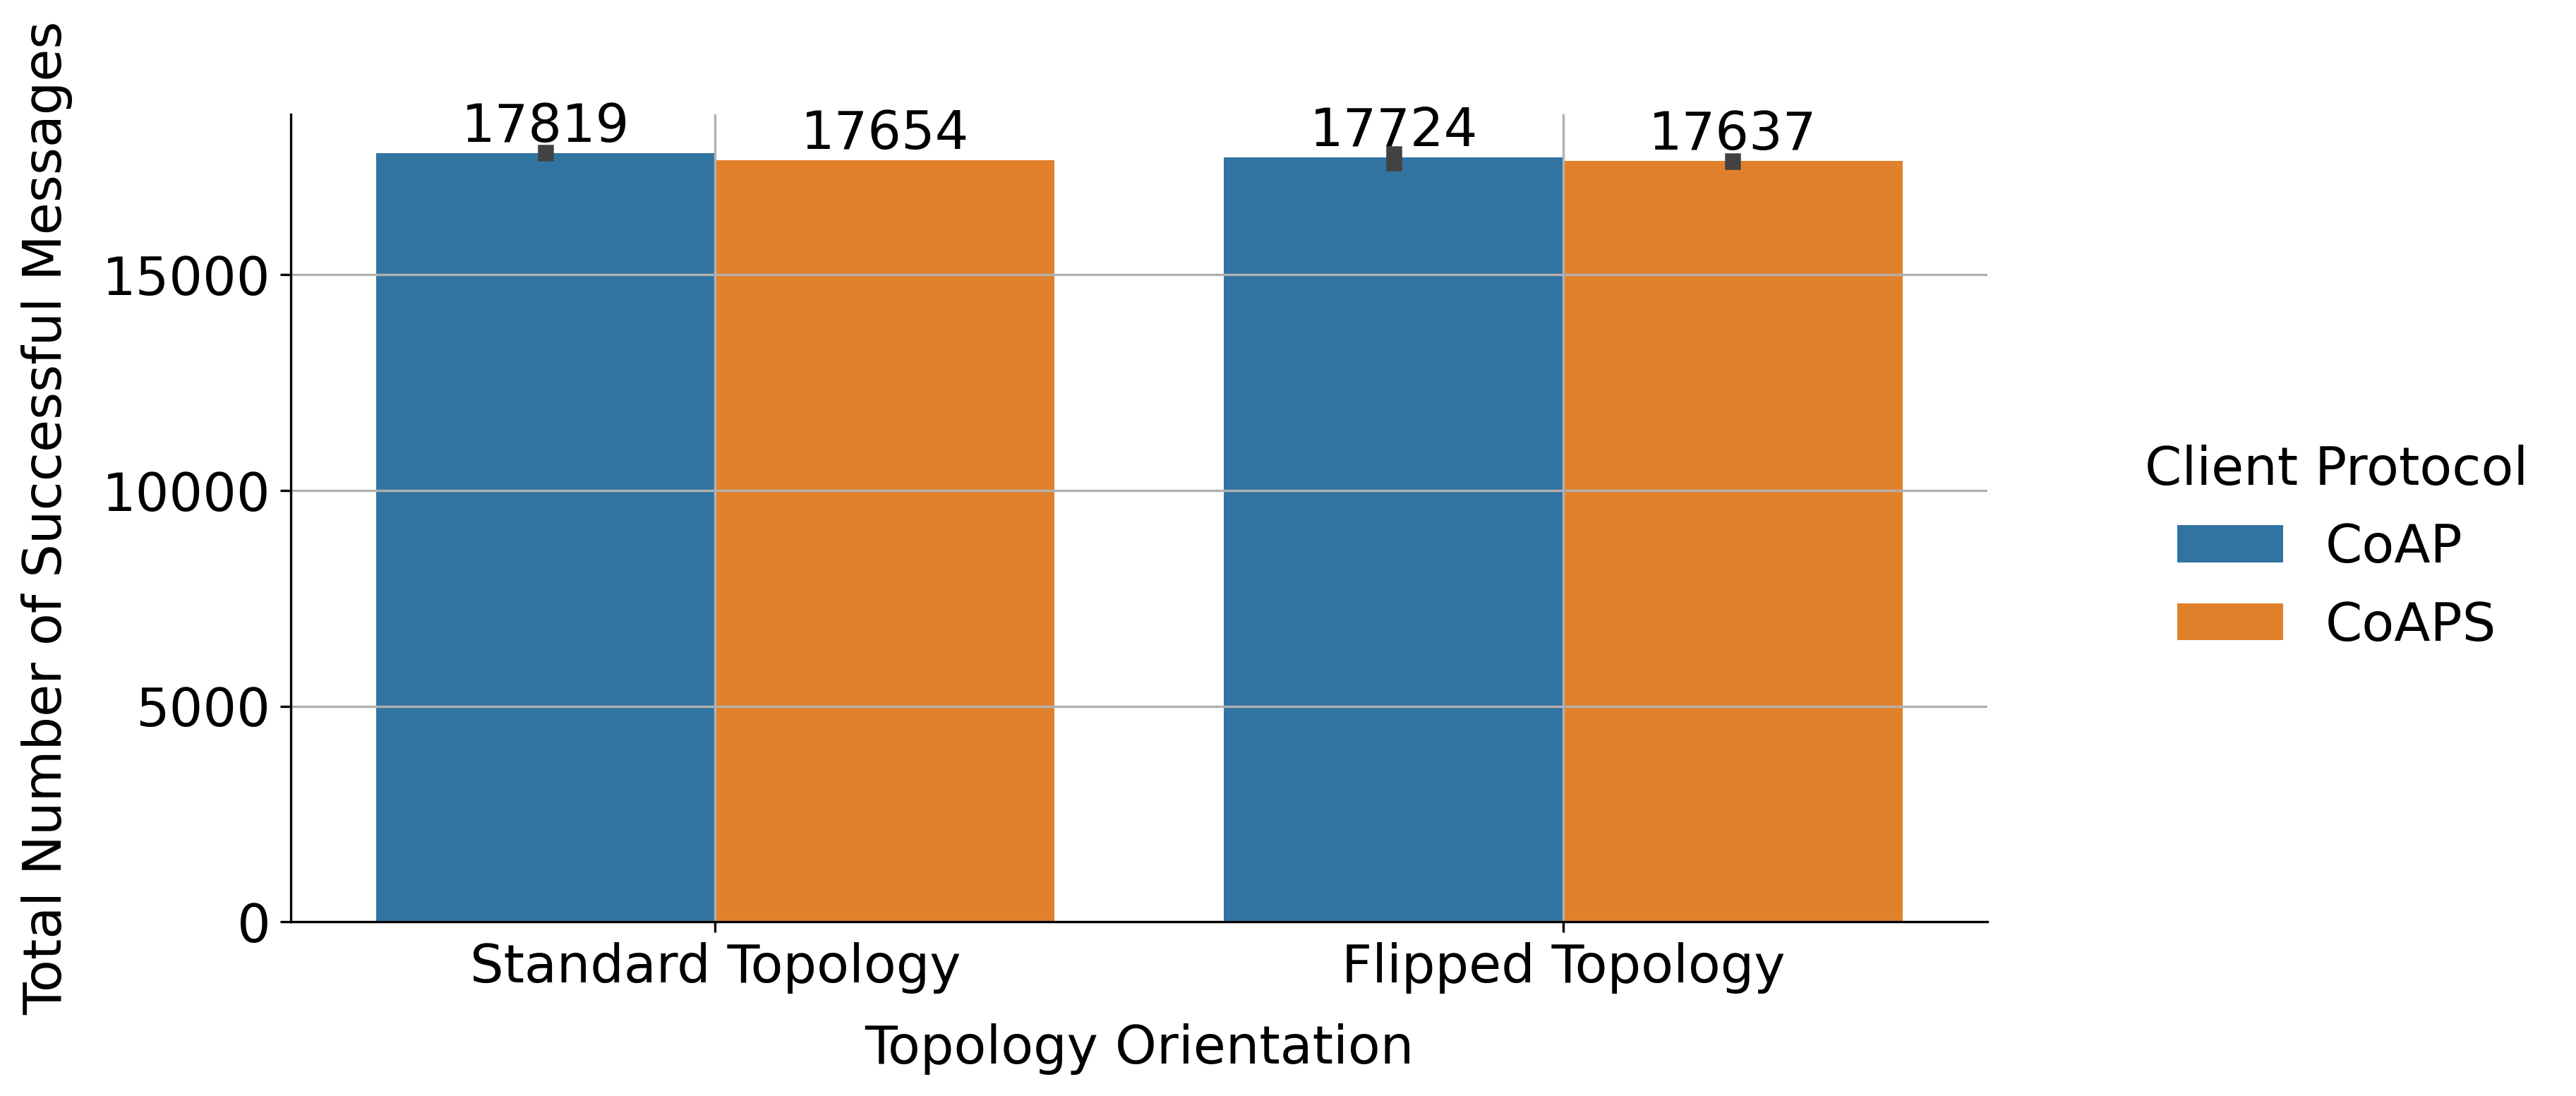

exp_id  \
70              thesis_group_topology_8clients_noattacker_coap_https   
71              thesis_group_topology_8clients_noattacker_coap_https   
72              thesis_group_topology_8clients_noattacker_coap_https   
73              thesis_group_topology_8clients_noattacker_coap_https   
74              thesis_group_topology_8clients_noattacker_coap_https   
75              thesis_group_topology_8clients_noattacker_dtls_https   
76              thesis_group_topology_8clients_noattacker_dtls_https   
77              thesis_group_topology_8clients_noattacker_dtls_https   
78              thesis_group_topology_8clients_noattacker_dtls_https   
79              thesis_group_topology_8clients_noattacker_dtls_https   
150  updated_thesis_group_num_clients_8clients_noattacker_coap_https   
151  updated_thesis_group_num_clients_8clients_noattacker_coap_https   
152  updated_thesis_group_num_clients_8clients_noattacker_coap_https   
153  updated_thesis_group_num_clients_8clients_noattacker_coap_https   
154  updated_thesis_group_num_clients_8clients_noattacker_coap_https   
155  updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
156  updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
157  updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
158  updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
159  updated_thesis_group_num_clients_8clients_noattacker_dtls_https   

    run_proxy_with_dtls topology_orientation      run_attacker  num_clients  \
70                 CoAP     Flipped Topology  Without Attacker            8   
71                 CoAP     Flipped Topology  Without Attacker            8   
72                 CoAP     Flipped Topology  Without Attacker            8   
73                 CoAP     Flipped Topology  Without Attacker            8   
74                 CoAP     Flipped Topology  Without Attacker            8   
75                CoAPS     Flipped Topology  Without Attacker            8   
76                CoAPS     Flipped Topology  Without Attacker            8   
77                CoAPS     Flipped Topology  Without Attacker            8   
78                CoAPS     Flipped Topology  Without Attacker            8   
79                CoAPS     Flipped Topology  Without Attacker            8   
150                CoAP    Standard Topology  Without Attacker            8   
151                CoAP    Standard Topology  Without Attacker            8   
152                CoAP    Standard Topology  Without Attacker            8   
153                CoAP    Standard Topology  Without Attacker            8   
154                CoAP    Standard Topology  Without Attacker            8   
155               CoAPS    Standard Topology  Without Attacker            8   
156               CoAPS    Standard Topology  Without Attacker            8   
157               CoAPS    Standard Topology  Without Attacker            8   
158               CoAPS    Standard Topology  Without Attacker            8   
159               CoAPS    Standard Topology  Without Attacker            8   

     trial  total_successful_messages  mean_active_time_sec  \
70       1                      17443            116.844196   
71       2                      17782            119.145256   
72       3                      17801            119.139968   
73       4                      17800            119.153346   
74       5                      17795            119.146628   
75       1                      17623            118.877679   
76       2                      17653            119.006112   
77       3                      17639            118.987889   
78       4                      17642            118.995318   
79       5                      17631            118.991946   
150      1                      17817            119.146938   
151      2                      17804            119.153960   
152      3                      17819            119.138679   
153    

In [11]:
## Plot total number of successful messages.

client_rps_df["active_time_sec"] = client_rps_df["last_active_time"] - client_rps_df["first_active_time"]

df = (
  client_rps_df
  .groupby(by=["exp_id", "run_proxy_with_dtls", "topology_orientation", "run_attacker", "num_clients", "trial"])
  .agg(
    total_successful_messages=("num_successful_messages", "sum"),
    mean_active_time_sec=("active_time_sec", "mean"),
  )
  .reset_index()
)
df["amortized_successful_rps"] = df["total_successful_messages"] / df["mean_active_time_sec"] / df["num_clients"]
df = df[df["run_attacker"] == "Without Attacker"]

g = sns.catplot(
  data=df,
  kind="bar",
  x="topology_orientation",
  y="total_successful_messages",
  hue="run_proxy_with_dtls",
  order=["Standard Topology", "Flipped Topology"],
  aspect=2,
  facet_kws={
    "sharey": True,
    "sharex": True,
  },
)

g.set_xlabels("Topology Orientation", labelpad=10)
g.set_ylabels("Total Number of Successful Messages", labelpad=10)
g.legend.set_title("Client Protocol")

axes = [
  g.axes[0,0],
]
for ax in axes:
  ax.grid(True, axis="y")
  for container in ax.containers:
    ax.bar_label(container, fmt="%d")

plt.grid(True, axis="both")
plt.show()

df

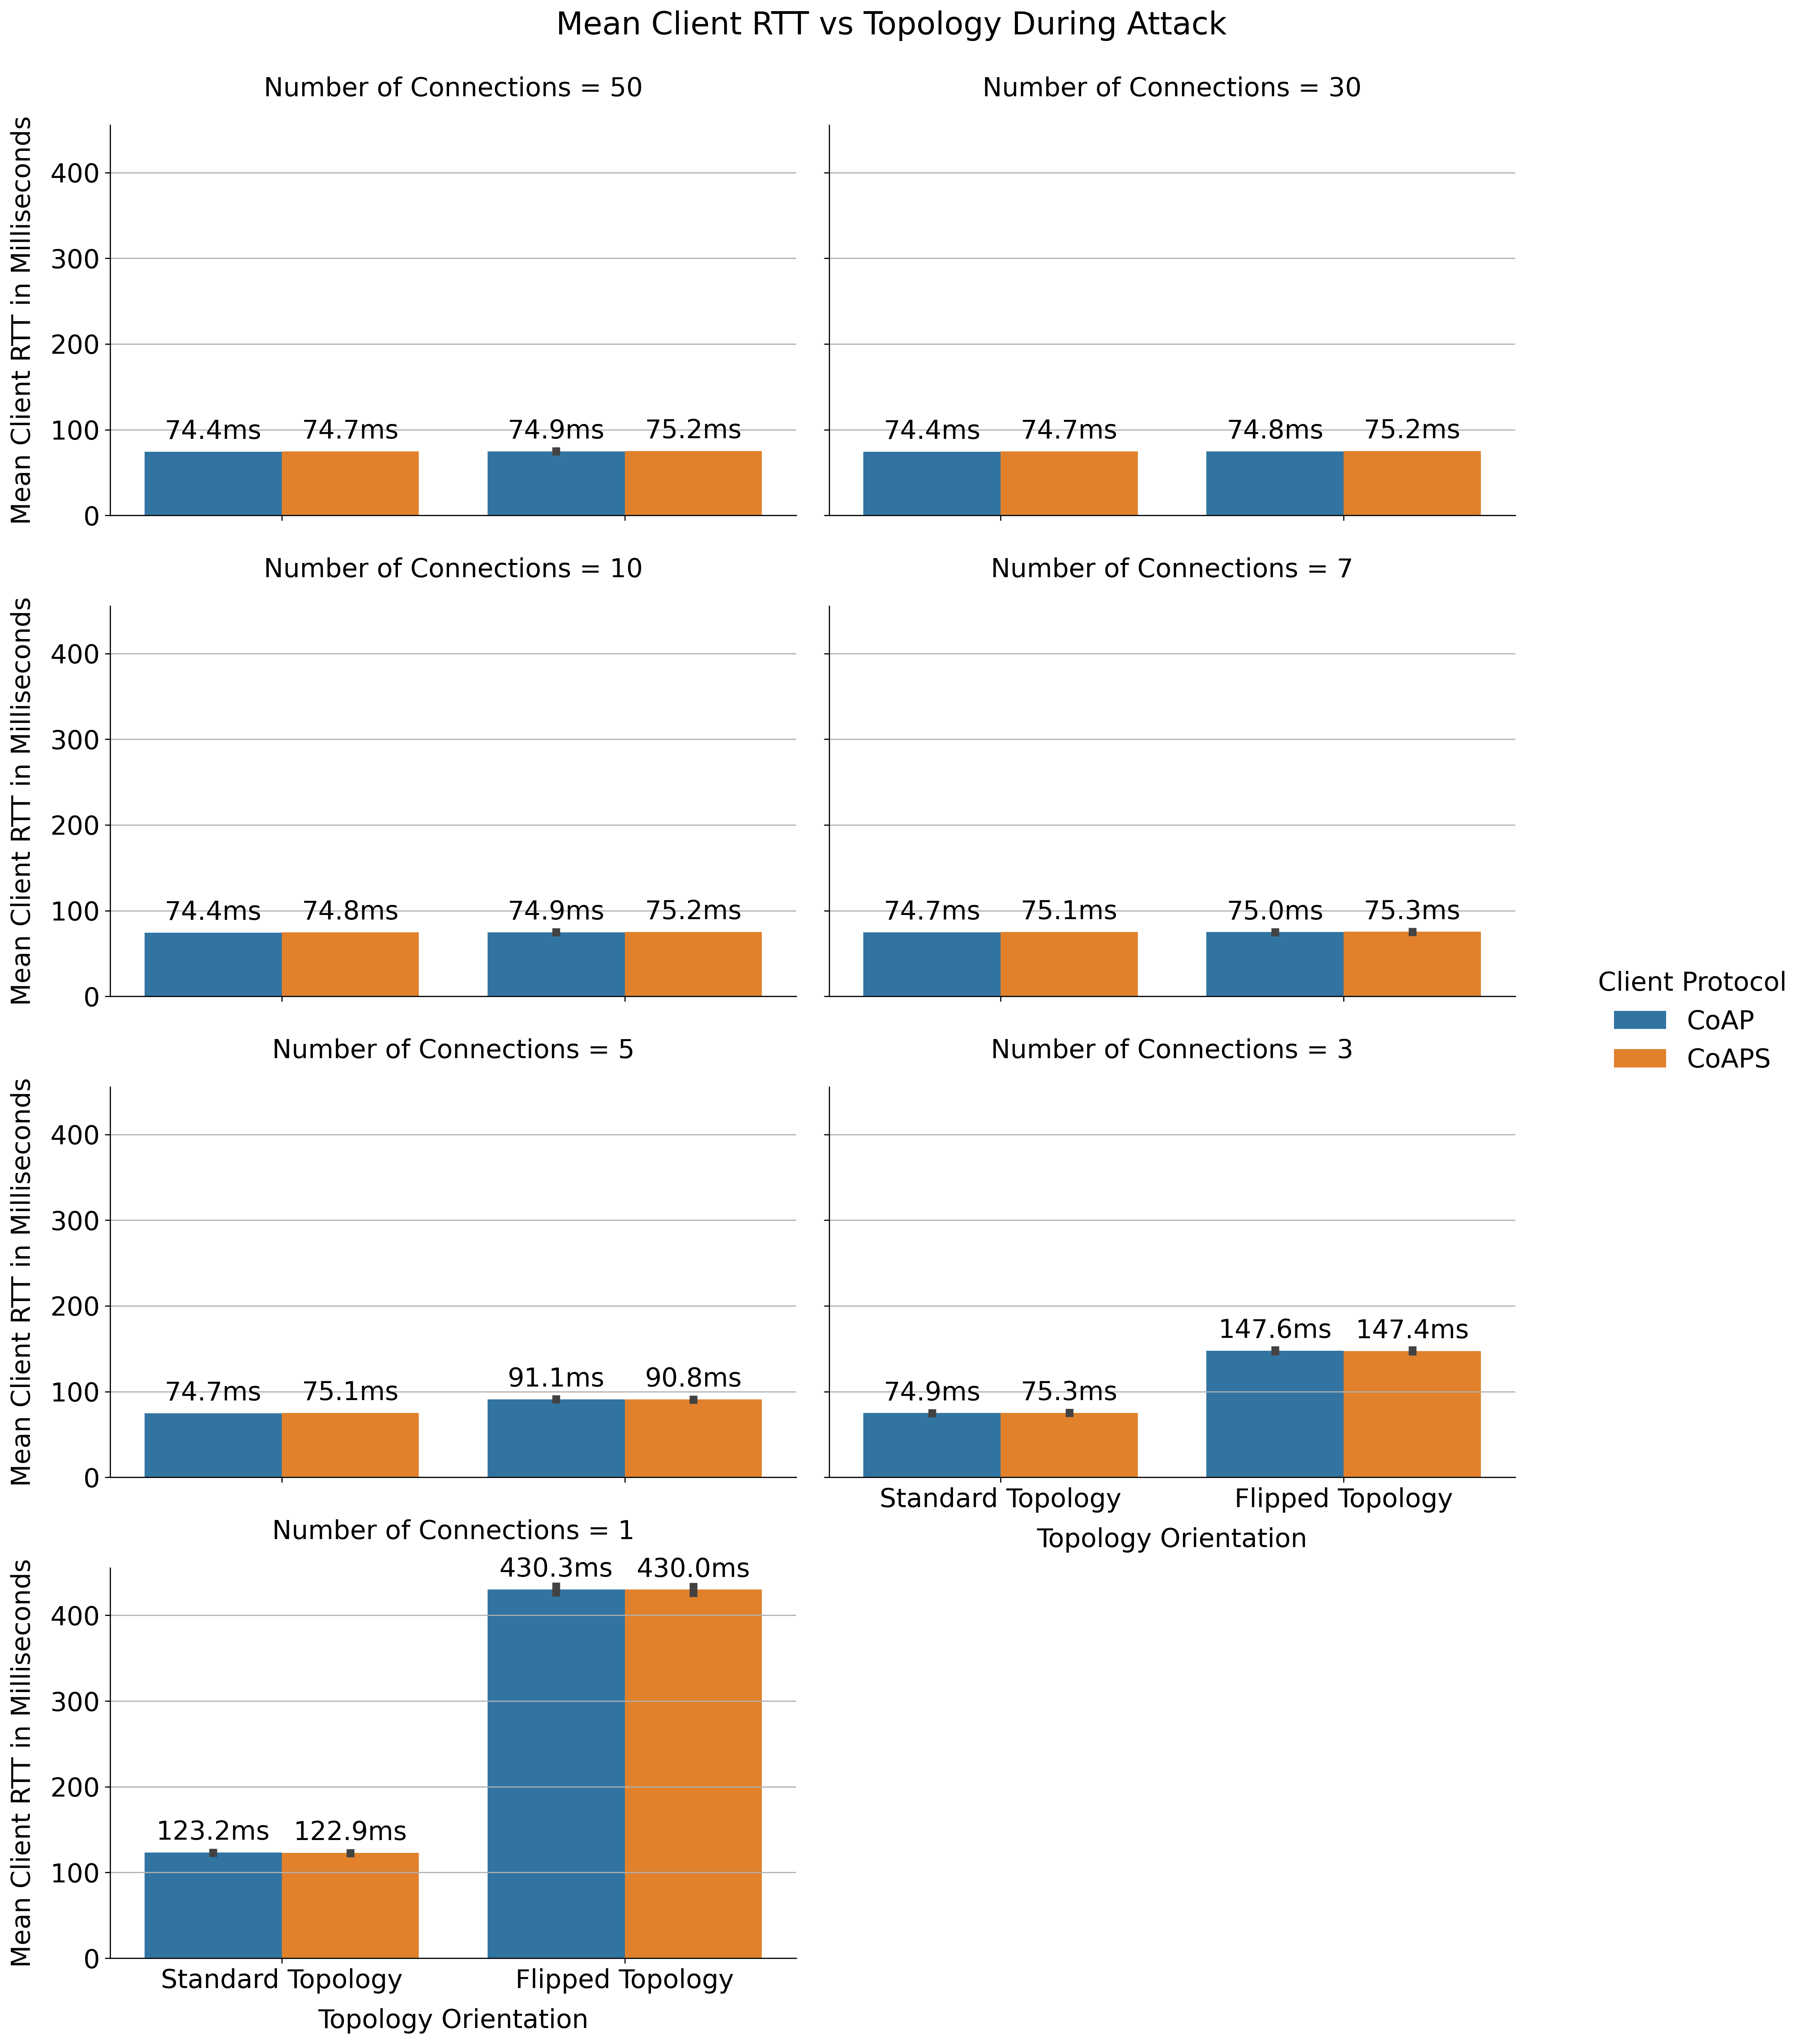

CPU times: user 4.78 s, sys: 223 ms, total: 5 s
Wall time: 4.66 s


exp_id  \
0     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
1     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
2     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
3     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
4     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
...                                                                                                ...   
1195                                            thesis_group_topology_8clients_withattacker_dtls_https   
1196                                            thesis_group_topology_8clients_withattacker_dtls_https   
1197                                            thesis_group_topology_8clients_withattacker_dtls_https   
1198                                            thesis_group_topology_8clients_withattacker_dtls_https   
1199                                            thesis_group_topology_8clients_withattacker_dtls_https   

      trial observer_id  num_messages  num_successful_messages   mean_rps  \
0         1     client1           961                      954   7.950000   
1         1     client2           959                      953   7.941667   
2         1     client3           957                      950   7.916667   
3         1     client4           955                      949   7.908333   
4         1     client5           956                      950   7.916667   
...     ...         ...           ...                      ...        ...   
1195      5     client4          1558                     1552  12.933333   
1196      5     client5          1561                     1555  12.958333   
1197      5     client6          1560                     1554  12.950000   
1198      5     client7          1564                     1558  12.983333   
1199      5     client8          1561                     1556  12.966667   

      max_num_retransmissions  total_num_retransmissions  stddev_rtt_ms  \
0                           2                          7     435.641562   
1                           2                          8     432.073531   
2                           2                          7     453.320769   
3                           2                          7     467.512099   
4                           2                          8     463.294291   
...                       ...                        ...            ...   
1195                        1                          7     326.715707   
1196                        1                          7     326.045652   
1197                        2                          7     366.846653   
1198                        1                          7     325.709181   
1199                        2                          6     414.618696   

      min_rtt_ms  ...  keep_alive_duration  request_retry_interval  \
0      54.063082  ...                  150                       1   
1      53.923130  ...                  150                       1   
2      53.842068  ...                  150                       1   
3      53.938866  ...                  150                       1   
4      52.661896  ...                  150                       1   
...          ...  ...                  ...                     ...   
1195   52.055836  ...                  150                       1   
1196   51.974058  ...                  150                       1   
1197   52.068949  ...                  150                       1   
1198   51.992178  ...                  150                       1   
1199   51.970959  ...                  150                       1   

      reuse_connections  run_proxy_with_dtls  run_proxy_with_https  \
0     Reuse Connections                 CoAP                 https   
1     Reuse Conn

In [12]:
%%time

df = (
  client_rps_df[client_rps_df["run_attacker"] == "With Attacker"]
)

connections = df["num_proxy_connections"].unique()

g = sns.catplot(
  data=df,
  kind="bar",
  x="topology_orientation",
  y="mean_rtt_ms",
  hue="run_proxy_with_dtls",
  col="num_proxy_connections",
  col_wrap=2,
  col_order=reversed(sorted(connections)),
  order=["Standard Topology", "Flipped Topology"],
  aspect=1.5,
  facet_kws={
    "sharey": True,
    "sharex": True,
  },
)

g.legend.set_title("Client Protocol")
g.set_xlabels("Topology Orientation", labelpad=10)
g.set_ylabels("Mean Client RTT in Milliseconds", labelpad=10)
g.set_titles(
  template="Number of Connections = {col_name}",
  pad=20,
)

axes = [ g.axes[i] for i in range(len(connections)) ]
for ax in axes:
  ax.grid(True, axis="y")
  for container in ax.containers:
    ax.bar_label(container, fmt="%1.1fms", padding=5)

g.fig.subplots_adjust(top=0.925)
g.fig.suptitle("Mean Client RTT vs Topology During Attack")

plt.show()

df

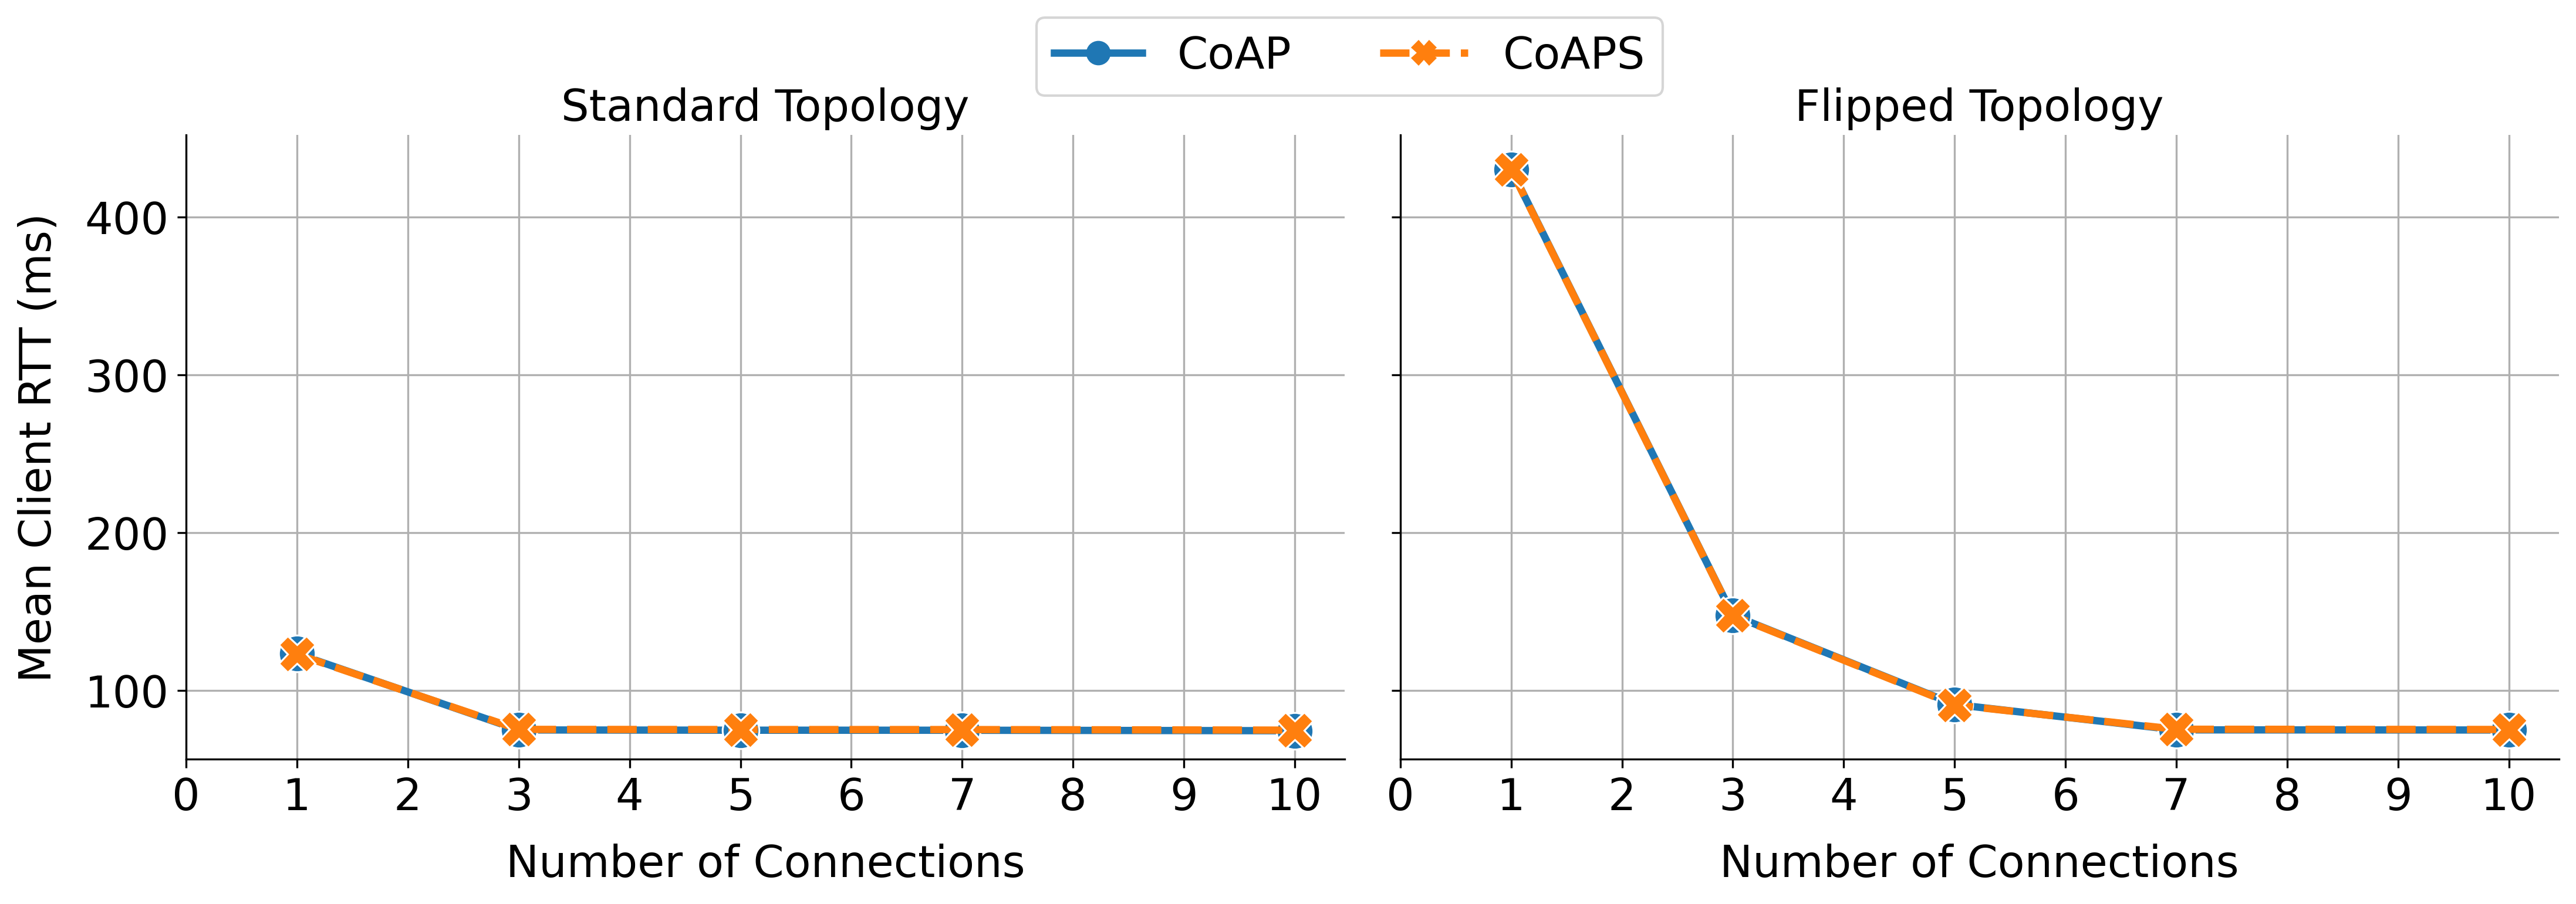

CPU times: user 2.71 s, sys: 143 ms, total: 2.86 s
Wall time: 2.55 s


exp_id  \
0     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
1     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
2     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
3     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
4     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
...                                                                                                ...   
1115                     thesis_group_topology_8clients_withattacker_8000MBheap_7proxyconns_dtls_https   
1116                     thesis_group_topology_8clients_withattacker_8000MBheap_7proxyconns_dtls_https   
1117                     thesis_group_topology_8clients_withattacker_8000MBheap_7proxyconns_dtls_https   
1118                     thesis_group_topology_8clients_withattacker_8000MBheap_7proxyconns_dtls_https   
1119                     thesis_group_topology_8clients_withattacker_8000MBheap_7proxyconns_dtls_https   

      trial observer_id  num_messages  num_successful_messages   mean_rps  \
0         1     client1           961                      954   7.950000   
1         1     client2           959                      953   7.941667   
2         1     client3           957                      950   7.916667   
3         1     client4           955                      949   7.908333   
4         1     client5           956                      950   7.916667   
...     ...         ...           ...                      ...        ...   
1115      5     client4          1559                     1552  12.933333   
1116      5     client5          1557                     1550  12.916667   
1117      5     client6          1559                     1553  12.941667   
1118      5     client7          1557                     1550  12.916667   
1119      5     client8          1561                     1555  12.958333   

      max_num_retransmissions  total_num_retransmissions  stddev_rtt_ms  \
0                           2                          7     435.641562   
1                           2                          8     432.073531   
2                           2                          7     453.320769   
3                           2                          7     467.512099   
4                           2                          8     463.294291   
...                       ...                        ...            ...   
1115                        2                          7     344.103595   
1116                        2                          7     343.132763   
1117                        1                          6     370.932322   
1118                        1                          7     322.977258   
1119                        2                          8     340.505297   

      min_rtt_ms  ...  keep_alive_duration  request_retry_interval  \
0      54.063082  ...                  150                       1   
1      53.923130  ...                  150                       1   
2      53.842068  ...                  150                       1   
3      53.938866  ...                  150                       1   
4      52.661896  ...                  150                       1   
...          ...  ...                  ...                     ...   
1115   52.265167  ...                  150                       1   
1116   52.216053  ...                  150                       1   
1117   52.166939  ...                  150                       1   
1118   52.012920  ...                  150                       1   
1119   52.139997  ...                  150                       1   

      reuse_connections  run_proxy_with_dtls  run_proxy_with_https  \
0     Reuse Connections                 CoAP                 https   
1     Reuse Conn

In [49]:
%%time

df = (
  client_rps_df[client_rps_df["run_attacker"] == "With Attacker"]
)
df = df[df["num_proxy_connections"] <= 10]

connections = df["num_proxy_connections"].unique()

g = sns.relplot(
  data=df,
  kind="line",
  x="num_proxy_connections",
  y="mean_rtt_ms",
  hue="run_proxy_with_dtls",
  style="run_proxy_with_dtls",
  col="topology_orientation",
  col_order=["Standard Topology", "Flipped Topology"],
  aspect=1.5,
  facet_kws={
    "sharey": True,
    "sharex": True,
  },
  markers=True,
  markersize=15,
)

g.legend.set_title("Client Protocol")
g.set_xlabels("Number of Connections", labelpad=10)
g.set_ylabels("Mean Client RTT (ms)", labelpad=10)
g.set_titles(
  template="{col_name}",
)

g.set(
  xticks=np.arange(0,11,1),
)

axes = [ g.axes[0, i] for i in range(len(df["topology_orientation"].unique())) ]
for ax in axes:
  ax.grid(True, axis="both")

sns.move_legend(
  g,
  "upper center",
  bbox_to_anchor=(0.45, 1.05),
  ncol=2,
  title=None,
  frameon=True,
)

plt.show()

df

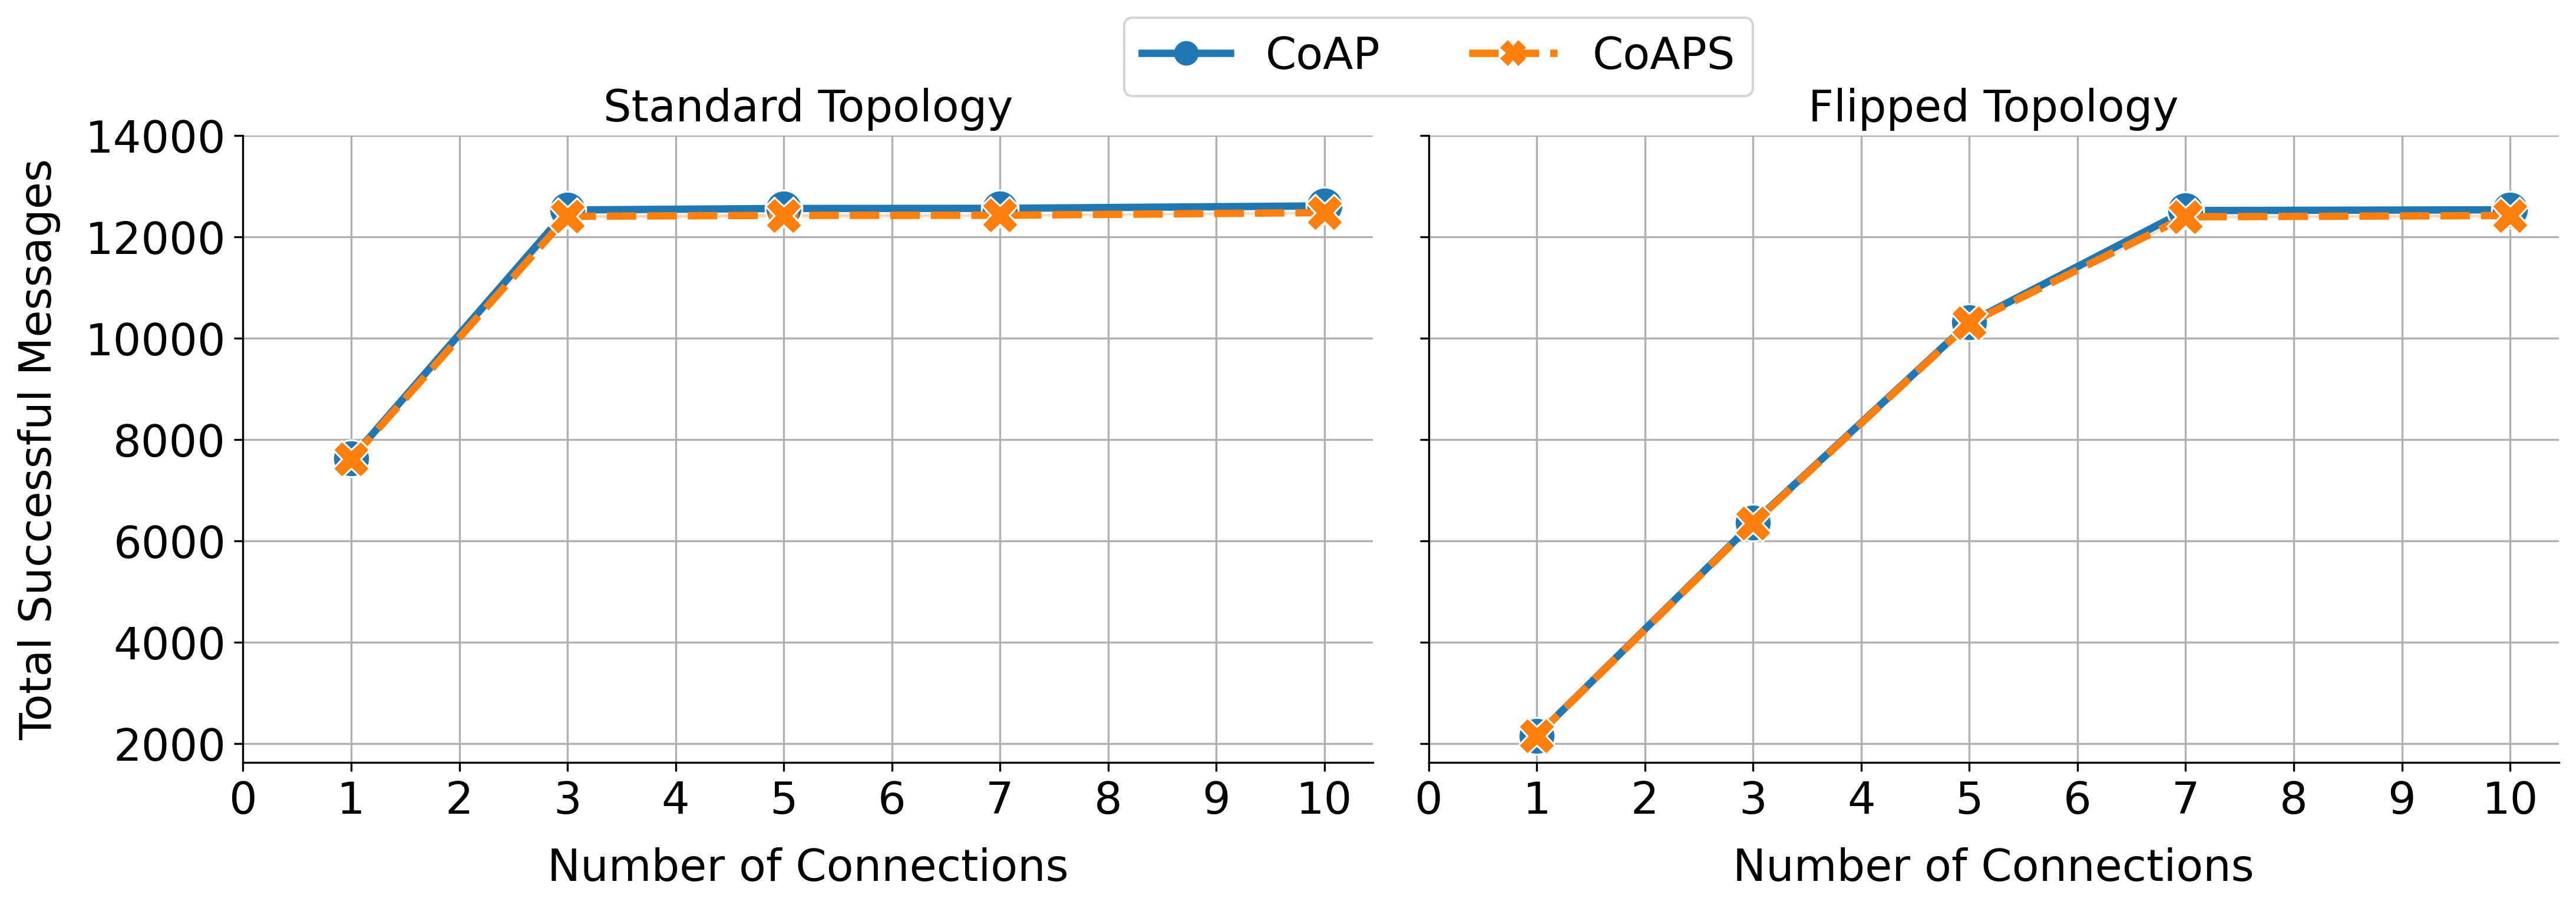

exp_id  \
0    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
1    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
2    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
3    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
4    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
..                                                                                                ...   
135                     thesis_group_topology_8clients_withattacker_8000MBheap_7proxyconns_dtls_https   
136                     thesis_group_topology_8clients_withattacker_8000MBheap_7proxyconns_dtls_https   
137                     thesis_group_topology_8clients_withattacker_8000MBheap_7proxyconns_dtls_https   
138                     thesis_group_topology_8clients_withattacker_8000MBheap_7proxyconns_dtls_https   
139                     thesis_group_topology_8clients_withattacker_8000MBheap_7proxyconns_dtls_https   

    run_proxy_with_dtls topology_orientation   run_attacker  \
0                  CoAP    Standard Topology  With Attacker   
1                  CoAP    Standard Topology  With Attacker   
2                  CoAP    Standard Topology  With Attacker   
3                  CoAP    Standard Topology  With Attacker   
4                  CoAP    Standard Topology  With Attacker   
..                  ...                  ...            ...   
135               CoAPS     Flipped Topology  With Attacker   
136               CoAPS     Flipped Topology  With Attacker   
137               CoAPS     Flipped Topology  With Attacker   
138               CoAPS     Flipped Topology  With Attacker   
139               CoAPS     Flipped Topology  With Attacker   

     num_proxy_connections  num_clients  trial  total_successful_messages  \
0                        1            8      1                       7629   
1                        1            8      2                       7639   
2                        1            8      3                       7605   
3                        1            8      4                       7646   
4                        1            8      5                       7623   
..                     ...          ...    ...                        ...   
135                      7            8      1                      12401   
136                      7            8      2                      12387   
137                      7            8      3                      12399   
138                      7            8      4                      12400   
139                      7            8      5                      12398   

     mean_active_time_sec  amortized_successful_rps  
0              119.131809                  8.004789  
1              119.136848                  8.014943  
2              119.144667                  7.978746  
3              119.128836                  8.022827  
4              119.128966                  7.998684  
..                    ...                       ...  
135            118.997800                 13.026501  
136            118.980411                 13.013697  
137            118.998721                 13.024300  
138            118.991368                 13.026155  
139            118.997554                 13.023377  

[100 rows x 10 columns]

In [57]:
## Plot total number of successful messages.

client_rps_df["active_time_sec"] = client_rps_df["last_active_time"] - client_rps_df["first_active_time"]

df = (
  client_rps_df
  .groupby(by=["exp_id", "run_proxy_with_dtls", "topology_orientation", "run_attacker", "num_proxy_connections", "num_clients", "trial"])
  .agg(
    total_successful_messages=("num_successful_messages", "sum"),
    mean_active_time_sec=("active_time_sec", "mean"),
  )
  .reset_index()
)
df["amortized_successful_rps"] = df["total_successful_messages"] / df["mean_active_time_sec"] / df["num_clients"]
df = df[df["run_attacker"] == "With Attacker"]
df = df[df["num_proxy_connections"] <= 10]
connections = df["num_proxy_connections"].unique()

g = sns.relplot(
  data=df,
  kind="line",
  x="num_proxy_connections",
  y="total_successful_messages",
  hue="run_proxy_with_dtls",
  style="run_proxy_with_dtls",
  col="topology_orientation",
  col_order=["Standard Topology", "Flipped Topology"],
  aspect=1.5,
  facet_kws={
    "sharey": True,
    "sharex": True,
  },
  markers=True,
  markersize=15,
)

g.set_xlabels("Number of Connections", labelpad=10)
g.set_ylabels("Total Successful Messages", labelpad=10)
g.legend.set_title("Client Protocol")
g.set_titles(
  template="{col_name}",
)

g.set(
  xticks=np.arange(0,11,1),
  yticks=np.arange(2_000,14_001,2_000),
)

axes = [ g.axes[0, i] for i in range(len(df["topology_orientation"].unique())) ]
for ax in axes:
  ax.grid(True, axis="both")

sns.move_legend(
  g,
  "upper center",
  bbox_to_anchor=(0.48, 1.05),
  ncol=2,
  title=None,
  frameon=True,
)

plt.show()

df

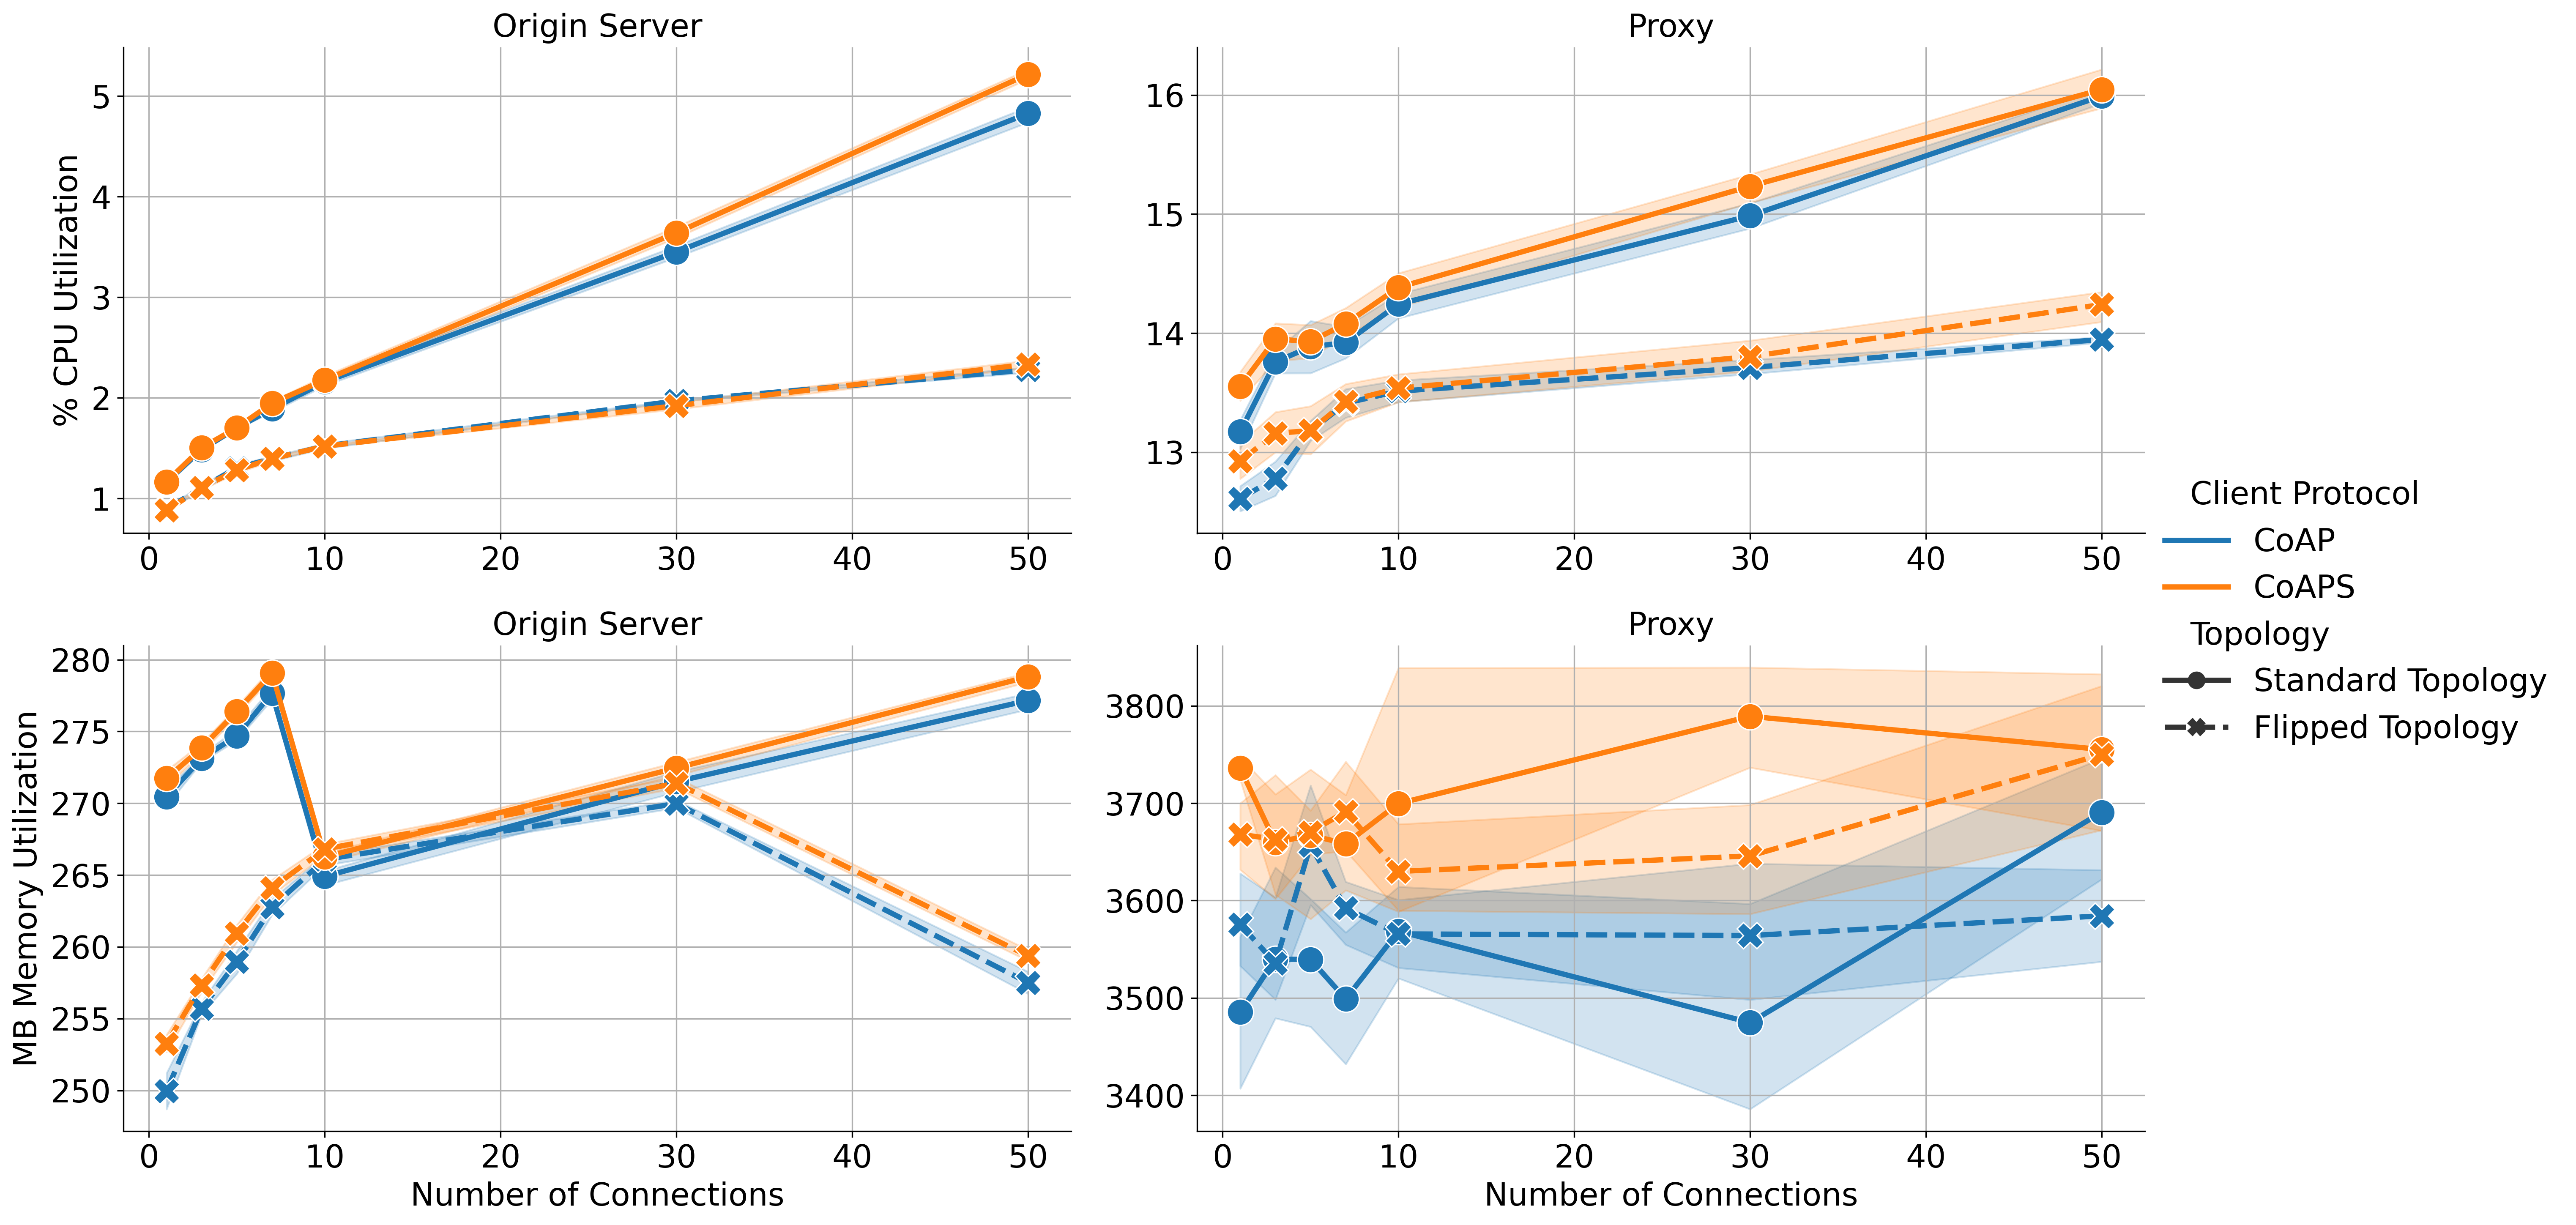

CPU times: user 6.72 s, sys: 132 ms, total: 6.86 s
Wall time: 6.54 s


exp_id  \
0    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
1    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
2    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
3    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
4    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
..                                                                                                ...   
595                                            thesis_group_topology_8clients_withattacker_dtls_https   
596                                            thesis_group_topology_8clients_withattacker_dtls_https   
597                                            thesis_group_topology_8clients_withattacker_dtls_https   
598                                            thesis_group_topology_8clients_withattacker_dtls_https   
599                                            thesis_group_topology_8clients_withattacker_dtls_https   

     trial    observer_id            metric_type    avg_value  min_value  \
0        1  Origin Server      % CPU Utilization     1.193571        0.4   
1        1          Proxy      % CPU Utilization    13.207857        0.5   
2        1  Origin Server  MB Memory Utilization   269.396694      257.0   
3        1          Proxy  MB Memory Utilization  3461.143095      252.0   
4        2  Origin Server      % CPU Utilization     1.154286        0.4   
..     ...            ...                    ...          ...        ...   
595      4          Proxy  MB Memory Utilization  3702.499168      241.0   
596      5  Origin Server      % CPU Utilization     2.342857        0.5   
597      5          Proxy      % CPU Utilization    14.293571        0.4   
598      5  Origin Server  MB Memory Utilization   260.019802      241.0   
599      5          Proxy  MB Memory Utilization  3738.565000      240.0   

     max_value attacker_rate  server_connections  max_keep_alive_requests  \
0          9.5       100mbps                 256                        0   
1         79.9       100mbps                 256                        0   
2        272.0       100mbps                 256                        0   
3       5686.0       100mbps                 256                        0   
4          9.4       100mbps                 256                        0   
..         ...           ...                 ...                      ...   
595     6174.0       100mbps                 256                        0   
596        9.0       100mbps                 256                        0   
597       93.9       100mbps                 256                        0   
598      264.0       100mbps                 256                        0   
599     6156.0       100mbps                 256                        0   

     ...  max_retries  keep_alive_duration  request_retry_interval  \
0    ...            4                  150                       1   
1    ...            4                  150                       1   
2    ...            4                  150                       1   
3    ...            4                  150                       1   
4    ...            4                  150                       1   
..   ...          ...                  ...                     ...   
595  ...            4                  150                       1   
596  ...            4                  150                       1   
597  ...            4                  150                       1   
598  ...            4                  150                       1   
599  ...            4                  150                       1   

     reuse_connections  Client Protocol  run_proxy_with_https   run_attacker  \
0    Reuse Connections             CoAP                  True  With Attacke

In [14]:
%%time

## Measure proxy and server metrics.

df = (
  metric_df.replace({
    "metric_type": {
      "cpu_utilization": "% CPU Utilization",
      "memory_utilization": "MB Memory Utilization",
    },
    "observer_id": {
      "proxy": "Proxy",
      "originserver": "Origin Server",
    },
  })
  .rename(columns={
    "run_proxy_with_dtls": "Client Protocol",
    "topology_orientation": "Topology",
  })
)

df = df[df["run_attacker"] == "With Attacker"]

g = sns.relplot(
  data=df,
  kind="line",
  x="num_proxy_connections",
  y="avg_value",
  col="observer_id",
  row="metric_type",
  hue="Client Protocol",
  style="Topology",
  markers=True,
  markersize=15,
  facet_kws={
    "sharey": False,
    "sharex": False,
  },
  aspect=1.75,
)

g.set_titles(
  template="{col_name}",
  col_template="{col_name}",
  row_template="{row_name}",
)
g.set_xlabels("Number of Connections")
g.set_ylabels("Average Metric Value")

g.axes[0,0].set_ylabel("% CPU Utilization")
g.axes[0,1].set_ylabel("")

g.axes[1,0].set_ylabel("MB Memory Utilization")
g.axes[1,1].set_ylabel("")

axes = [
  g.axes[0,0],
  g.axes[0,1],
  g.axes[1,0],
  g.axes[1,1],
]
for ax in axes:
  ax.grid(True, axis="both")

plt.show()

df

In [15]:
%%time

## Measure proxy and server connection management.
##
## We currently do not insert connection events to
## the database, so we have to read from the processed
## connection files.

ALL_EXPERIMENTS_DATA_HOME = "/home/ubuntu/dos-californium/deter/expdata/real/final"

def read_exp_trial_node_connections(exp_id):
  """
  Read all processed connection dumps in an experiment `exp_id`.
  """
  experiment_dir = os.path.join(ALL_EXPERIMENTS_DATA_HOME, exp_id)

  df = (
    pl
    .scan_parquet(
      f"{experiment_dir}/*/{exp_id}.connections.parquet"
    )
  )
  lazy_dfs.append(df)

lazy_dfs = list()
for exp_id in exp_df["exp_id"].unique():
  read_exp_trial_node_connections(exp_id)

connections_df = (
  pl
  .concat(lazy_dfs)

  # Filter for proxy's view of syn-acks or fin-acks coming from server
  .filter(
    (pl.col("observer_id") == "proxy")
    & ((pl.col("is_syn") == 1) | (pl.col("is_fin") == 1))
    & (pl.col("info").str.contains(", ACK]"))
    & (pl.col("src_port") == 443)
  )
  # Group by experiment, trial, and observer, then accummulate
  # syn-acks and fin-acks in a list, along with their corresponding
  # timestamps of occurrence for each group.
  .groupby(
    by=["exp_id", "trial", "observer_id"],
    maintain_order=True
  )
  .agg([
    pl.col("timestamp").alias("timestamp"),
    pl.col("is_syn").cumsum().alias("cum_syn"),
    pl.col("is_fin").cumsum().alias("cum_fin"),
  ])
  # Explode the cumulative syns and fins, and their times, then
  # subtract them to get a view of how many open connections there
  # are in the experiment as a function of time
  .explode(columns=["timestamp", "cum_syn", "cum_fin"])
  .with_columns([
    (pl.col("cum_syn") - pl.col("cum_fin")).alias("open_connections")
  ])

  # And finally convert to pandas for plotting.
  .collect()
  .to_pandas()
)

# This method of counting does not include the original 0 connections
# at time 0 for each node in each trial -- so we add that manually.
records = list()
for e in connections_df["exp_id"].unique():
  for t in connections_df["trial"].unique():
    for o in connections_df["observer_id"].unique():
      records.append({
        "exp_id"          : e,
        "trial"           : t,
        "observer_id"     : o,
        "timestamp"       : 0.0,
        "cum_syn"         : 0,
        "cum_fin"         : 0,
        "open_connections": 0,
      })
connections_df = (
  pd.concat(
    [connections_df, pd.DataFrame.from_records(records)]
  )
  .sort_values(by=["exp_id", "trial", "observer_id", "timestamp"])
)

# This method also does not include a connection count at the last time
# the proxy is meant to be active -- so we fill that value in based on the
# last value.
last_connection_df = (
  connections_df
  .groupby(by=["exp_id", "trial", "observer_id"], sort=True)
  .agg(
    max_timestamp=("timestamp", "max"),
    last_timestamp=("timestamp", "last"),
    max_open_connections=("open_connections", "max"),
    last_open_connections=("open_connections", "last"),
    last_cum_syn=("cum_syn", "last"),
    last_cum_fin=("cum_fin", "last"),
  )
  .reset_index()
)
# assert last_connection_df["max_timestamp"].equals(last_connection_df["last_timestamp"])
# assert last_connection_df["max_open_connections"].equals(last_connection_df["last_open_connections"])
records = list()
for r in last_connection_df.to_dict(orient="records"):
  records.append({
    "exp_id"          : r["exp_id"],
    "trial"           : r["trial"],
    "observer_id"     : r["observer_id"],
    "timestamp"       : 140,
    "cum_syn"         : r["last_cum_syn"],
    "cum_fin"         : r["last_cum_fin"],
    "open_connections": r["last_open_connections"],
  })
connections_df = (
  pd.concat(
    [connections_df, pd.DataFrame.from_records(records)]
  )
  .sort_values(by=["exp_id", "trial", "observer_id", "timestamp"])
)

connections_df = (
  connections_df
  .merge(exp_df, on="exp_id", how="left")
  .replace({
    "run_proxy_with_dtls": {
      True : "CoAPS",
      False: "CoAP",
    },
  })
)

connections_df

CPU times: user 4min 20s, sys: 7min 39s, total: 12min
Wall time: 38.2 s


exp_id  \
0     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
1     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
2     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
3     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
4     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
...                                                                                                ...   
4346                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
4347                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
4348                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
4349                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
4350                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   

      trial observer_id   timestamp  cum_syn  cum_fin  open_connections  \
0         1       proxy    0.000000        0        0                 0   
1         1       proxy    0.063143        1        0                 1   
2         1       proxy  140.000000        1        0                 1   
3         2       proxy    0.000000        0        0                 0   
4         2       proxy    0.064441        1        0                 1   
...     ...         ...         ...      ...      ...               ...   
4346      5       proxy    7.365021        5        0                 5   
4347      5       proxy    7.909375        6        0                 6   
4348      5       proxy   26.272243        7        0                 7   
4349      5       proxy   26.272244        8        0                 8   
4350      5       proxy  140.000000        8        0                 8   

     attacker_rate  server_connections  max_keep_alive_requests  ...  \
0          100mbps                 256                        0  ...   
1          100mbps                 256                        0  ...   
2          100mbps                 256                        0  ...   
3          100mbps                 256                        0  ...   
4          100mbps                 256                        0  ...   
...            ...                 ...                      ...  ...   
4346         0mbps                 256                        0  ...   
4347         0mbps                 256                        0  ...   
4348         0mbps                 256                        0  ...   
4349         0mbps                 256                        0  ...   
4350         0mbps                 256                        0  ...   

      max_retries  keep_alive_duration  request_retry_interval  \
0               4                  150                       1   
1               4                  150                       1   
2               4                  150                       1   
3               4                  150                       1   
4               4                  150                       1   
...           ...                  ...                     ...   
4346            4                  150                       1   
4347            4                  150                       1   
4348            4                  150                       1   
4349            4                  150                       1   
4350            4                  150                       1   

      reuse_connections  run_proxy_with_dtls  run_proxy_with_https  \
0                  True                 CoAP                  True   
1                  True                 CoAP                  True   
2                  True                 CoAP          

In [16]:
%%time

max_timestamp = np.ceil(connections_df.timestamp.max())
min_timestamp = np.floor(connections_df.timestamp.min())
steps = np.arange(min_timestamp, max_timestamp + 1, 5)

filled_connections_df = (
  connections_df
  .groupby(by=[
    "exp_id", "observer_id", "trial",
    pd.cut(connections_df["timestamp"], steps)
  ], sort=True)
  .agg(
    open_connections=("open_connections", "mean"),
  )
  .fillna(method="ffill")
  .reset_index()
)

filled_connections_df["timestamp"] = filled_connections_df["timestamp"].map(operator.attrgetter("right"))
filled_connections_df = filled_connections_df.merge(exp_df, on="exp_id", how="left")
filled_connections_df = filled_connections_df.replace(value_map_replacement)

filled_connections_df

CPU times: user 75.3 ms, sys: 6.98 ms, total: 82.3 ms
Wall time: 78.9 ms


exp_id  \
0     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
1     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
2     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
3     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
4     thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
...                                                                                                ...   
4475                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
4476                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
4477                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
4478                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
4479                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   

     observer_id  trial timestamp  open_connections attacker_rate  \
0          proxy      1       5.0               1.0       100mbps   
1          proxy      1      10.0               1.0       100mbps   
2          proxy      1      15.0               1.0       100mbps   
3          proxy      1      20.0               1.0       100mbps   
4          proxy      1      25.0               1.0       100mbps   
...          ...    ...       ...               ...           ...   
4475       proxy      5     120.0               7.5         0mbps   
4476       proxy      5     125.0               7.5         0mbps   
4477       proxy      5     130.0               7.5         0mbps   
4478       proxy      5     135.0               7.5         0mbps   
4479       proxy      5     140.0               8.0         0mbps   

      server_connections  max_keep_alive_requests  num_clients  num_trials  \
0                    256                        0            8           5   
1                    256                        0            8           5   
2                    256                        0            8           5   
3                    256                        0            8           5   
4                    256                        0            8           5   
...                  ...                      ...          ...         ...   
4475                 256                        0            8           5   
4476                 256                        0            8           5   
4477                 256                        0            8           5   
4478                 256                        0            8           5   
4479                 256                        0            8           5   

      ...  max_retries  keep_alive_duration  request_retry_interval  \
0     ...            4                  150                       1   
1     ...            4                  150                       1   
2     ...            4                  150                       1   
3     ...            4                  150                       1   
4     ...            4                  150                       1   
...   ...          ...                  ...                     ...   
4475  ...            4                  150                       1   
4476  ...            4                  150                       1   
4477  ...            4                  150                       1   
4478  ...            4                  150                       1   
4479  ...            4                  150                       1   

      reuse_connections  run_proxy_with_dtls  run_proxy_with_https  \
0     Reuse Connections                 CoAP                  True   
1     Reuse Connections                 CoAP                  Tr

In [17]:
%%time

attacker_message_sql = f"""
WITH attacker_recvs AS (
  SELECT
  dn.exp_id AS exp_id,
  e.observer_id AS observer_id,
  e.observe_timestamp AS observe_timestamp,
  e.trial AS trial,
  e.message_marker AS message_marker,
  cm.coap_code AS coap_code
  FROM event e
  JOIN message m ON m.message_id = e.message_id
  JOIN coap_message cm ON cm.cmci = m.coap_message
  JOIN deployed_node dn ON dn.dnid = e.observer_id
  WHERE e.observer_id IN ({','.join(map(str, attacker_dnids))})   -- attacker dnids
  AND m.dst_id IN ({','.join(map(str, attacker_node_ids))}) -- attackers are receivers (node ID)
),

attacker_response_breakdown AS (
  SELECT
    exp_id,
    trial,
    observer_id,
    coap_code AS response_code,
    COUNT(coap_code) AS response_code_count
  FROM
    attacker_recvs
  GROUP BY
    exp_id, trial, observer_id, response_code
  ORDER BY
    exp_id, trial, observer_id, response_code
),

attacker_response_count AS (
  SELECT
    exp_id,
    trial,
    observer_id,
    SUM(response_code_count) AS response_count
  FROM
    attacker_response_breakdown
  GROUP BY
    exp_id, trial, observer_id
  ORDER BY
    exp_id, trial, observer_id
)

SELECT * FROM attacker_response_breakdown
"""

attacker_message_df = client.query_dataframe(attacker_message_sql)

attacker_message_df.observer_id.replace(dnid_map_node_name, inplace=True)
attacker_message_df = attacker_message_df.merge(exp_df, on="exp_id", how="left")
attacker_message_df.replace(value_map_replacement, inplace=True)

attacker_message_df

CPU times: user 208 ms, sys: 31.6 ms, total: 240 ms
Wall time: 35.7 s


exp_id  \
0    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
1    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
2    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
3    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
4    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
..                                                                                                ...   
275                                            thesis_group_topology_8clients_withattacker_dtls_https   
276                                            thesis_group_topology_8clients_withattacker_dtls_https   
277                                            thesis_group_topology_8clients_withattacker_dtls_https   
278                                            thesis_group_topology_8clients_withattacker_dtls_https   
279                                            thesis_group_topology_8clients_withattacker_dtls_https   

     trial observer_id response_code  response_code_count attacker_rate  \
0        1    attacker   Bad Gateway               656417       100mbps   
1        1    attacker       Content                 1811       100mbps   
2        2    attacker   Bad Gateway               669970       100mbps   
3        2    attacker       Content                 1791       100mbps   
4        3    attacker   Bad Gateway               687558       100mbps   
..     ...         ...           ...                  ...           ...   
275      3    attacker       Content                29421       100mbps   
276      4    attacker   Bad Gateway               547072       100mbps   
277      4    attacker       Content                29389       100mbps   
278      5    attacker   Bad Gateway               554374       100mbps   
279      5    attacker       Content                29517       100mbps   

     server_connections  max_keep_alive_requests  num_clients  num_trials  \
0                   256                        0            8           5   
1                   256                        0            8           5   
2                   256                        0            8           5   
3                   256                        0            8           5   
4                   256                        0            8           5   
..                  ...                      ...          ...         ...   
275                 256                        0            8           5   
276                 256                        0            8           5   
277                 256                        0            8           5   
278                 256                        0            8           5   
279                 256                        0            8           5   

     ...  max_retries  keep_alive_duration  request_retry_interval  \
0    ...            4                  150                       1   
1    ...            4                  150                       1   
2    ...            4                  150                       1   
3    ...            4                  150                       1   
4    ...            4                  150                       1   
..   ...          ...                  ...                     ...   
275  ...            4                  150                       1   
276  ...            4                  150                       1   
277  ...            4                  150                       1   
278  ...            4                  150                       1   
279  ...            4                  150                       1   

     reuse_connections  run_proxy_with_dtls  run_proxy_with_https  \
0    Reuse Connections                 CoAP                  True   
1    Reuse Connections       

In [18]:
#TODO adapt

_df = (
  df
  .groupby(
    by=["exp_id", "Response Code", "Client Protocol", "num_proxy_connections"]
  )
  .agg(
    response_code_count=("response_code_count", "mean")
  )
  .reset_index()
)

total_df = (
  _df
  .groupby(
    by=["exp_id", "Client Protocol"]
  )
  .agg(
    sum_response_code_count=("response_code_count", "sum")
  )
  .reset_index()
)

_df = _df.merge(total_df, on=["exp_id", "Client Protocol"], how="left")

_df["response_code_percentage"] = round(100 * _df["response_code_count"] / _df["sum_response_code_count"], 1)

_df.sort_values(by=["num_proxy_connections", "Client Protocol"])

KeyError: 'Response Code'

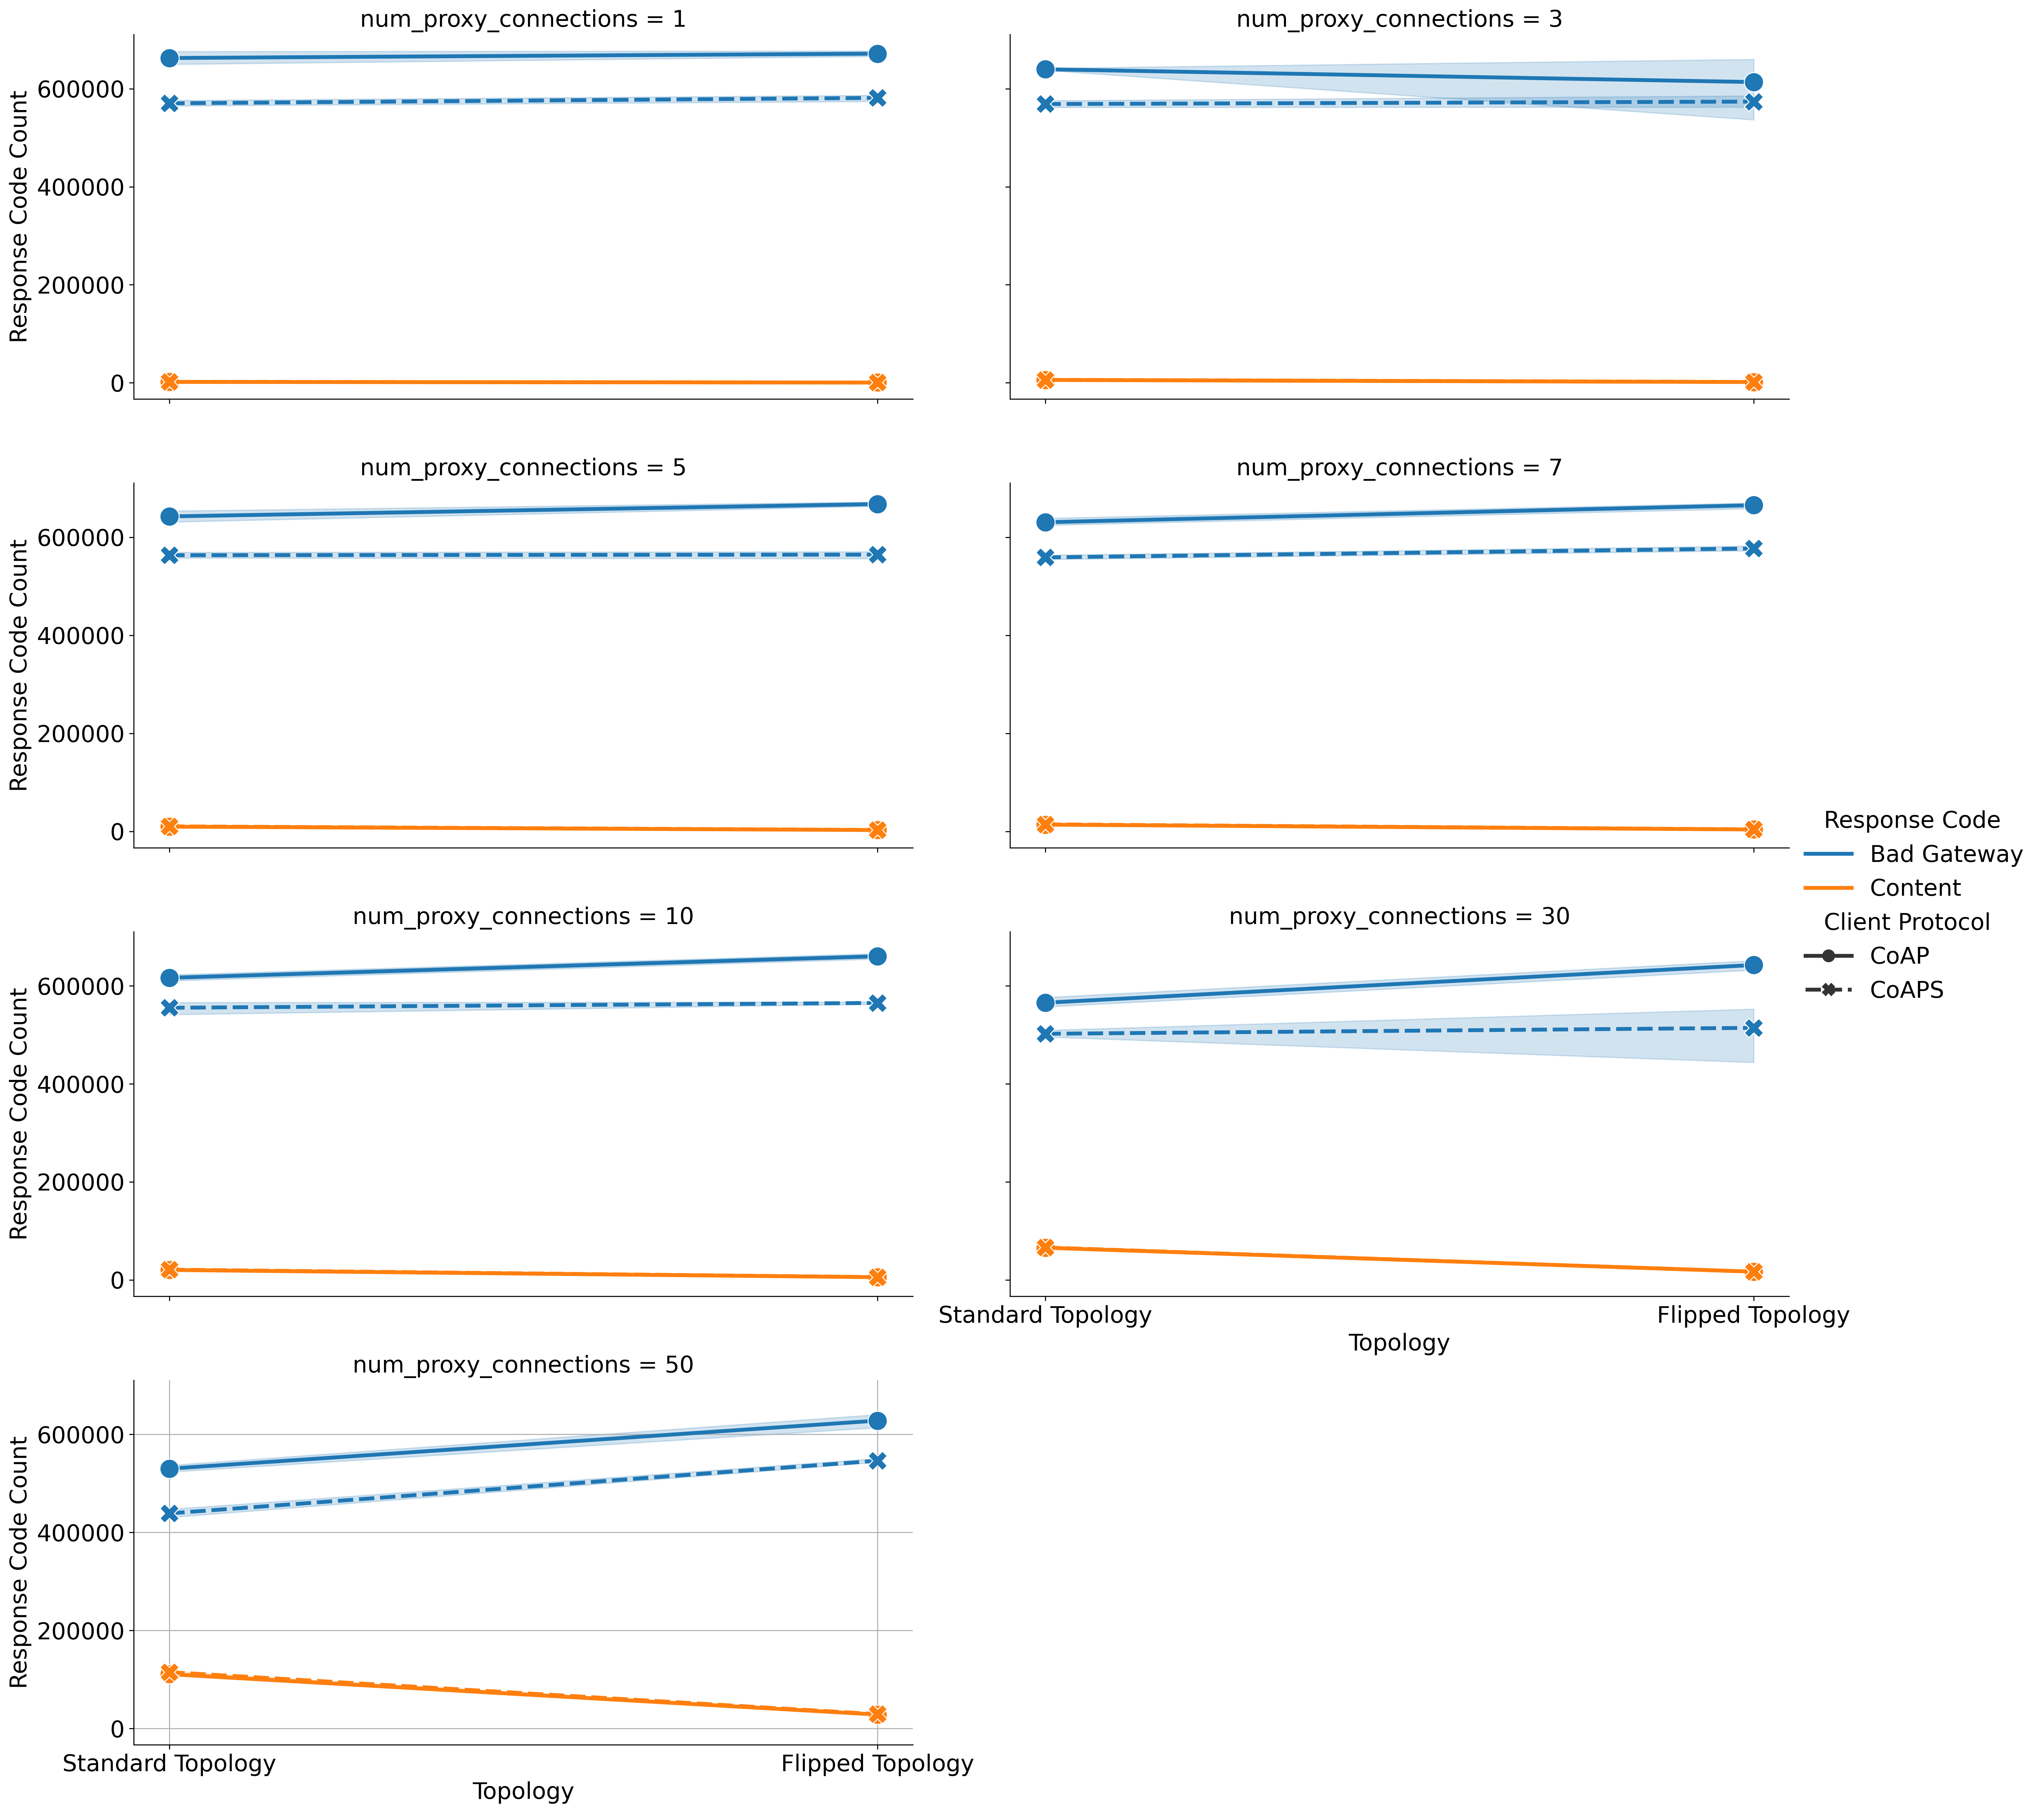

CPU times: user 7.24 s, sys: 813 ms, total: 8.05 s
Wall time: 7.74 s


exp_id  \
0    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
1    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
2    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
3    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
4    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
..                                                                                                ...   
275                                            thesis_group_topology_8clients_withattacker_dtls_https   
276                                            thesis_group_topology_8clients_withattacker_dtls_https   
277                                            thesis_group_topology_8clients_withattacker_dtls_https   
278                                            thesis_group_topology_8clients_withattacker_dtls_https   
279                                            thesis_group_topology_8clients_withattacker_dtls_https   

     trial observer_id Response Code  response_code_count attacker_rate  \
0        1    attacker   Bad Gateway               656417       100mbps   
1        1    attacker       Content                 1811       100mbps   
2        2    attacker   Bad Gateway               669970       100mbps   
3        2    attacker       Content                 1791       100mbps   
4        3    attacker   Bad Gateway               687558       100mbps   
..     ...         ...           ...                  ...           ...   
275      3    attacker       Content                29421       100mbps   
276      4    attacker   Bad Gateway               547072       100mbps   
277      4    attacker       Content                29389       100mbps   
278      5    attacker   Bad Gateway               554374       100mbps   
279      5    attacker       Content                29517       100mbps   

     server_connections  max_keep_alive_requests  num_clients  num_trials  \
0                   256                        0            8           5   
1                   256                        0            8           5   
2                   256                        0            8           5   
3                   256                        0            8           5   
4                   256                        0            8           5   
..                  ...                      ...          ...         ...   
275                 256                        0            8           5   
276                 256                        0            8           5   
277                 256                        0            8           5   
278                 256                        0            8           5   
279                 256                        0            8           5   

     ...  max_retries  keep_alive_duration  request_retry_interval  \
0    ...            4                  150                       1   
1    ...            4                  150                       1   
2    ...            4                  150                       1   
3    ...            4                  150                       1   
4    ...            4                  150                       1   
..   ...          ...                  ...                     ...   
275  ...            4                  150                       1   
276  ...            4                  150                       1   
277  ...            4                  150                       1   
278  ...            4                  150                       1   
279  ...            4                  150                       1   

     reuse_connections  Client Protocol  run_proxy_with_https   run_attacker  \
0    Reuse Connections             CoAP                  True  With Attacker   
1    Re

In [ ]:
%%time

df = (
  attacker_message_df
  .replace(value_map_replacement)
  .rename(columns={
    "response_code": "Response Code",
    "run_proxy_with_dtls": "Client Protocol",
  })
)

g = sns.relplot(
  data=df,
  kind="line",
  x="topology_orientation",
  y="response_code_count",
  hue="Response Code",
  style="Client Protocol",
  markers=True,
  markersize=15,
  col="num_proxy_connections",
  col_wrap=2,
  aspect=2,
)

g.set_xlabels("Topology")
g.set_ylabels("Response Code Count")
# g.set(
#   xticks=np.arange(5,61,5),
#   # yticks=np.arange(1,9,1),
# )

plt.grid(True, axis="both")
plt.show()

df

In [ ]:
%%time

originserver_message_sql = f"""
WITH originserver_recvs AS (
  SELECT
    dn.exp_id AS exp_id,
    e.observer_id AS observer_id,
    e.observe_timestamp AS observe_timestamp,
    e.trial AS trial,
    e.message_marker AS message_marker,
    hm.http_response_code AS http_response_code,
    m.src_id AS src_id,
    m.dst_id AS dst_id
  FROM
    event e
  JOIN
    message m ON m.message_id = e.message_id
  JOIN
    http_message hm ON hm.hmci = m.http_message
  JOIN
    deployed_node dn ON dn.dnid = e.observer_id
  WHERE
    e.observer_id IN ({','.join(map(str, proxy_dnids))})   -- proxy dnids
    AND (
      m.src_id IN ({','.join(map(str, originserver_node_ids))}) -- originservers are senders (node ID)
      OR m.dst_id IN ({','.join(map(str, originserver_node_ids))}) -- originservers are receivers (node ID)
    )
),

originserver_response_breakdown AS (
  SELECT
    exp_id,
    trial,
    observer_id,
    src_id,
    dst_id,
    http_response_code AS response_code,
    COUNT(http_response_code) AS response_code_count
  FROM
    originserver_recvs
  GROUP BY
    exp_id, trial, observer_id, src_id, dst_id, response_code
  ORDER BY
    exp_id, trial, observer_id, src_id, dst_id, response_code
)

SELECT * FROM originserver_response_breakdown
"""

originserver_message_df = client.query_dataframe(originserver_message_sql)

originserver_message_df.replace({
  "observer_id": dnid_map_node_name,
  "src_id": node_id_map_node_name,
  "dst_id": node_id_map_node_name,
}, inplace=True)

originserver_message_df = originserver_message_df.merge(exp_df, on="exp_id", how="left")

originserver_message_df

CPU times: user 121 ms, sys: 27.3 ms, total: 148 ms
Wall time: 37 s


exp_id  \
0    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
1    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
2    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
3    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
4    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
..                                                                                                ...   
315                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
316                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
317                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
318                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   
319                                   updated_thesis_group_num_clients_8clients_noattacker_dtls_https   

     trial observer_id        src_id        dst_id  response_code  \
0        1       proxy  originserver         proxy            200   
1        1       proxy         proxy  originserver             -1   
2        2       proxy  originserver         proxy            200   
3        2       proxy         proxy  originserver             -1   
4        3       proxy  originserver         proxy            200   
..     ...         ...           ...           ...            ...   
315      3       proxy         proxy  originserver             -1   
316      4       proxy  originserver         proxy            200   
317      4       proxy         proxy  originserver             -1   
318      5       proxy  originserver         proxy            200   
319      5       proxy         proxy  originserver             -1   

     response_code_count attacker_rate  server_connections  \
0                   9495       100mbps                 256   
1                   9495       100mbps                 256   
2                   9483       100mbps                 256   
3                   9483       100mbps                 256   
4                   9418       100mbps                 256   
..                   ...           ...                 ...   
315                17720         0mbps                 256   
316                17705         0mbps                 256   
317                17705         0mbps                 256   
318                17722         0mbps                 256   
319                17722         0mbps                 256   

     max_keep_alive_requests  ...  max_retries  keep_alive_duration  \
0                          0  ...            4                  150   
1                          0  ...            4                  150   
2                          0  ...            4                  150   
3                          0  ...            4                  150   
4                          0  ...            4                  150   
..                       ...  ...          ...                  ...   
315                        0  ...            4                  150   
316                        0  ...            4                  150   
317                        0  ...            4                  150   
318                        0  ...            4                  150   
319                        0  ...            4                  150   

     request_retry_interval  reuse_connections  run_proxy_with_dtls  \
0                         1               True                False   
1                         1               True                False   
2                         1               True                False   
3                         1               True                False   
4                         1               True      

In [ ]:
# TODO adapt and graph

In [50]:
%%time

communication_pattern_rates_sql = f"""
WITH all_patterns AS (
  SELECT
    dn.exp_id AS exp_id,
    e.trial AS trial,
    e.observe_timestamp AS observe_timestamp,
    floor(e.observe_timestamp) AS timestamp_bin,
    e.message_marker AS message_marker,
    concat(node_src.node_name, '->', node_dst.node_name) AS communication_pattern,
    m.size_bytes AS size_bytes
  FROM
    event e
    JOIN deployed_node dn ON dn.dnid = e.observer_id
    JOIN message m ON m.message_id = e.message_id
    JOIN node node_src ON node_src.node_id = m.src_id
    JOIN node node_dst ON node_dst.node_id = m.dst_id

), pattern_aggregations AS (
  SELECT
    exp_id,
    trial,
    communication_pattern,
    timestamp_bin,
    SUM(size_bytes) AS sum_bytes,
    COUNT(DISTINCT message_marker) AS num_messages
  FROM
    all_patterns
  GROUP BY
    exp_id, trial, communication_pattern, timestamp_bin
)

SELECT
  *,
  (1e-6 * sum_bytes) AS megabytes_per_second,
  (8 * 1e-6 * sum_bytes) AS megabits_per_second
FROM
  pattern_aggregations
ORDER BY
  timestamp_bin
"""

binned_messages_df = client.query_dataframe(communication_pattern_rates_sql)

binned_messages_df = binned_messages_df.merge(exp_df, on="exp_id", how="left")
binned_messages_df.replace(value_map_replacement, inplace=True)

filtered_binned_messages_df = binned_messages_df[
  (binned_messages_df["communication_pattern"].str.contains("proxy->originserver"))
]
filtered_binned_messages_df.replace(value_map_replacement, inplace=True)

filtered_binned_messages_df

Error on localhost:9000 ping: Unexpected EOF while reading bytes
Connection was closed, reconnecting.
Error on socket shutdown: [Errno 107] Transport endpoint is not connected


CPU times: user 1.92 s, sys: 215 ms, total: 2.13 s
Wall time: 2min 1s


<timed exec>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


exp_id  \
4                                                                  thesis_group_topology_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
20                                                                 thesis_group_topology_8clients_withattacker_8000MBheap_7proxyconns_dtls_https   
22      thesis_group_controlling_proxy_rtt_8clients_withattacker_8000MBheap_50proxyconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   
30                                                                thesis_group_topology_8clients_withattacker_8000MBheap_30proxyconns_dtls_https   
34                                                                                        thesis_group_topology_8clients_withattacker_coap_https   
...                                                                                                                                          ...   
300729                                                             thesis_group_topology_8clients_withattacker_8000MBheap_5proxyconns_dtls_https   
300733                                          thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_5proxyconns_coap_https   
300734                                                             thesis_group_topology_8clients_withattacker_8000MBheap_3proxyconns_dtls_https   
300738                                                                                      thesis_group_topology_8clients_noattacker_coap_https   
300739  thesis_group_controlling_proxy_rtt_8clients_withattacker_8000MBheap_30proxyconns_coap_https__140sec_proxy__30sec_attacker__120sec_client   

        trial communication_pattern  timestamp_bin  sum_bytes  num_messages  \
4           4   proxy->originserver            0.0       2070             9   
20          3   proxy->originserver            0.0       2532            11   
22          2   proxy->originserver            0.0       2993            13   
30          5   proxy->originserver            0.0       2532            11   
34          5   proxy->originserver            0.0       2532            11   
...       ...                   ...            ...        ...           ...   
300729      5   proxy->originserver          126.0       2330            10   
300733      1   proxy->originserver          126.0       3262            14   
300734      1   proxy->originserver          126.0       3016            13   
300738      3   proxy->originserver          126.0       3262            14   
300739      5   proxy->originserver          126.0       3495            15   

        megabytes_per_second  megabits_per_second attacker_rate  \
4                   0.002070             0.016560       100mbps   
20                  0.002532             0.020256       100mbps   
22                  0.002993             0.023944       100mbps   
30                  0.002532             0.020256       100mbps   
34                  0.002532             0.020256       100mbps   
...                      ...                  ...           ...   
300729              0.002330             0.018640       100mbps   
300733              0.003262             0.026096       100mbps   
300734              0.003016             0.024128       100mbps   
300738              0.003262             0.026096         0mbps   
300739              0.003495             0.027960       100mbps   

        server_connections  ...  max_retries  keep_alive_duration  \
4                      256  ...            4                  150   
20                     256  ...            4                  150   
22                     256  ...            2                    5   
30                     256  ...            4                  150   
34                     256  ...            4                  150   
...                    ...  ...          ...                  ...   
300729                 256  ...            4                  150   
300733                 256  ...            4           

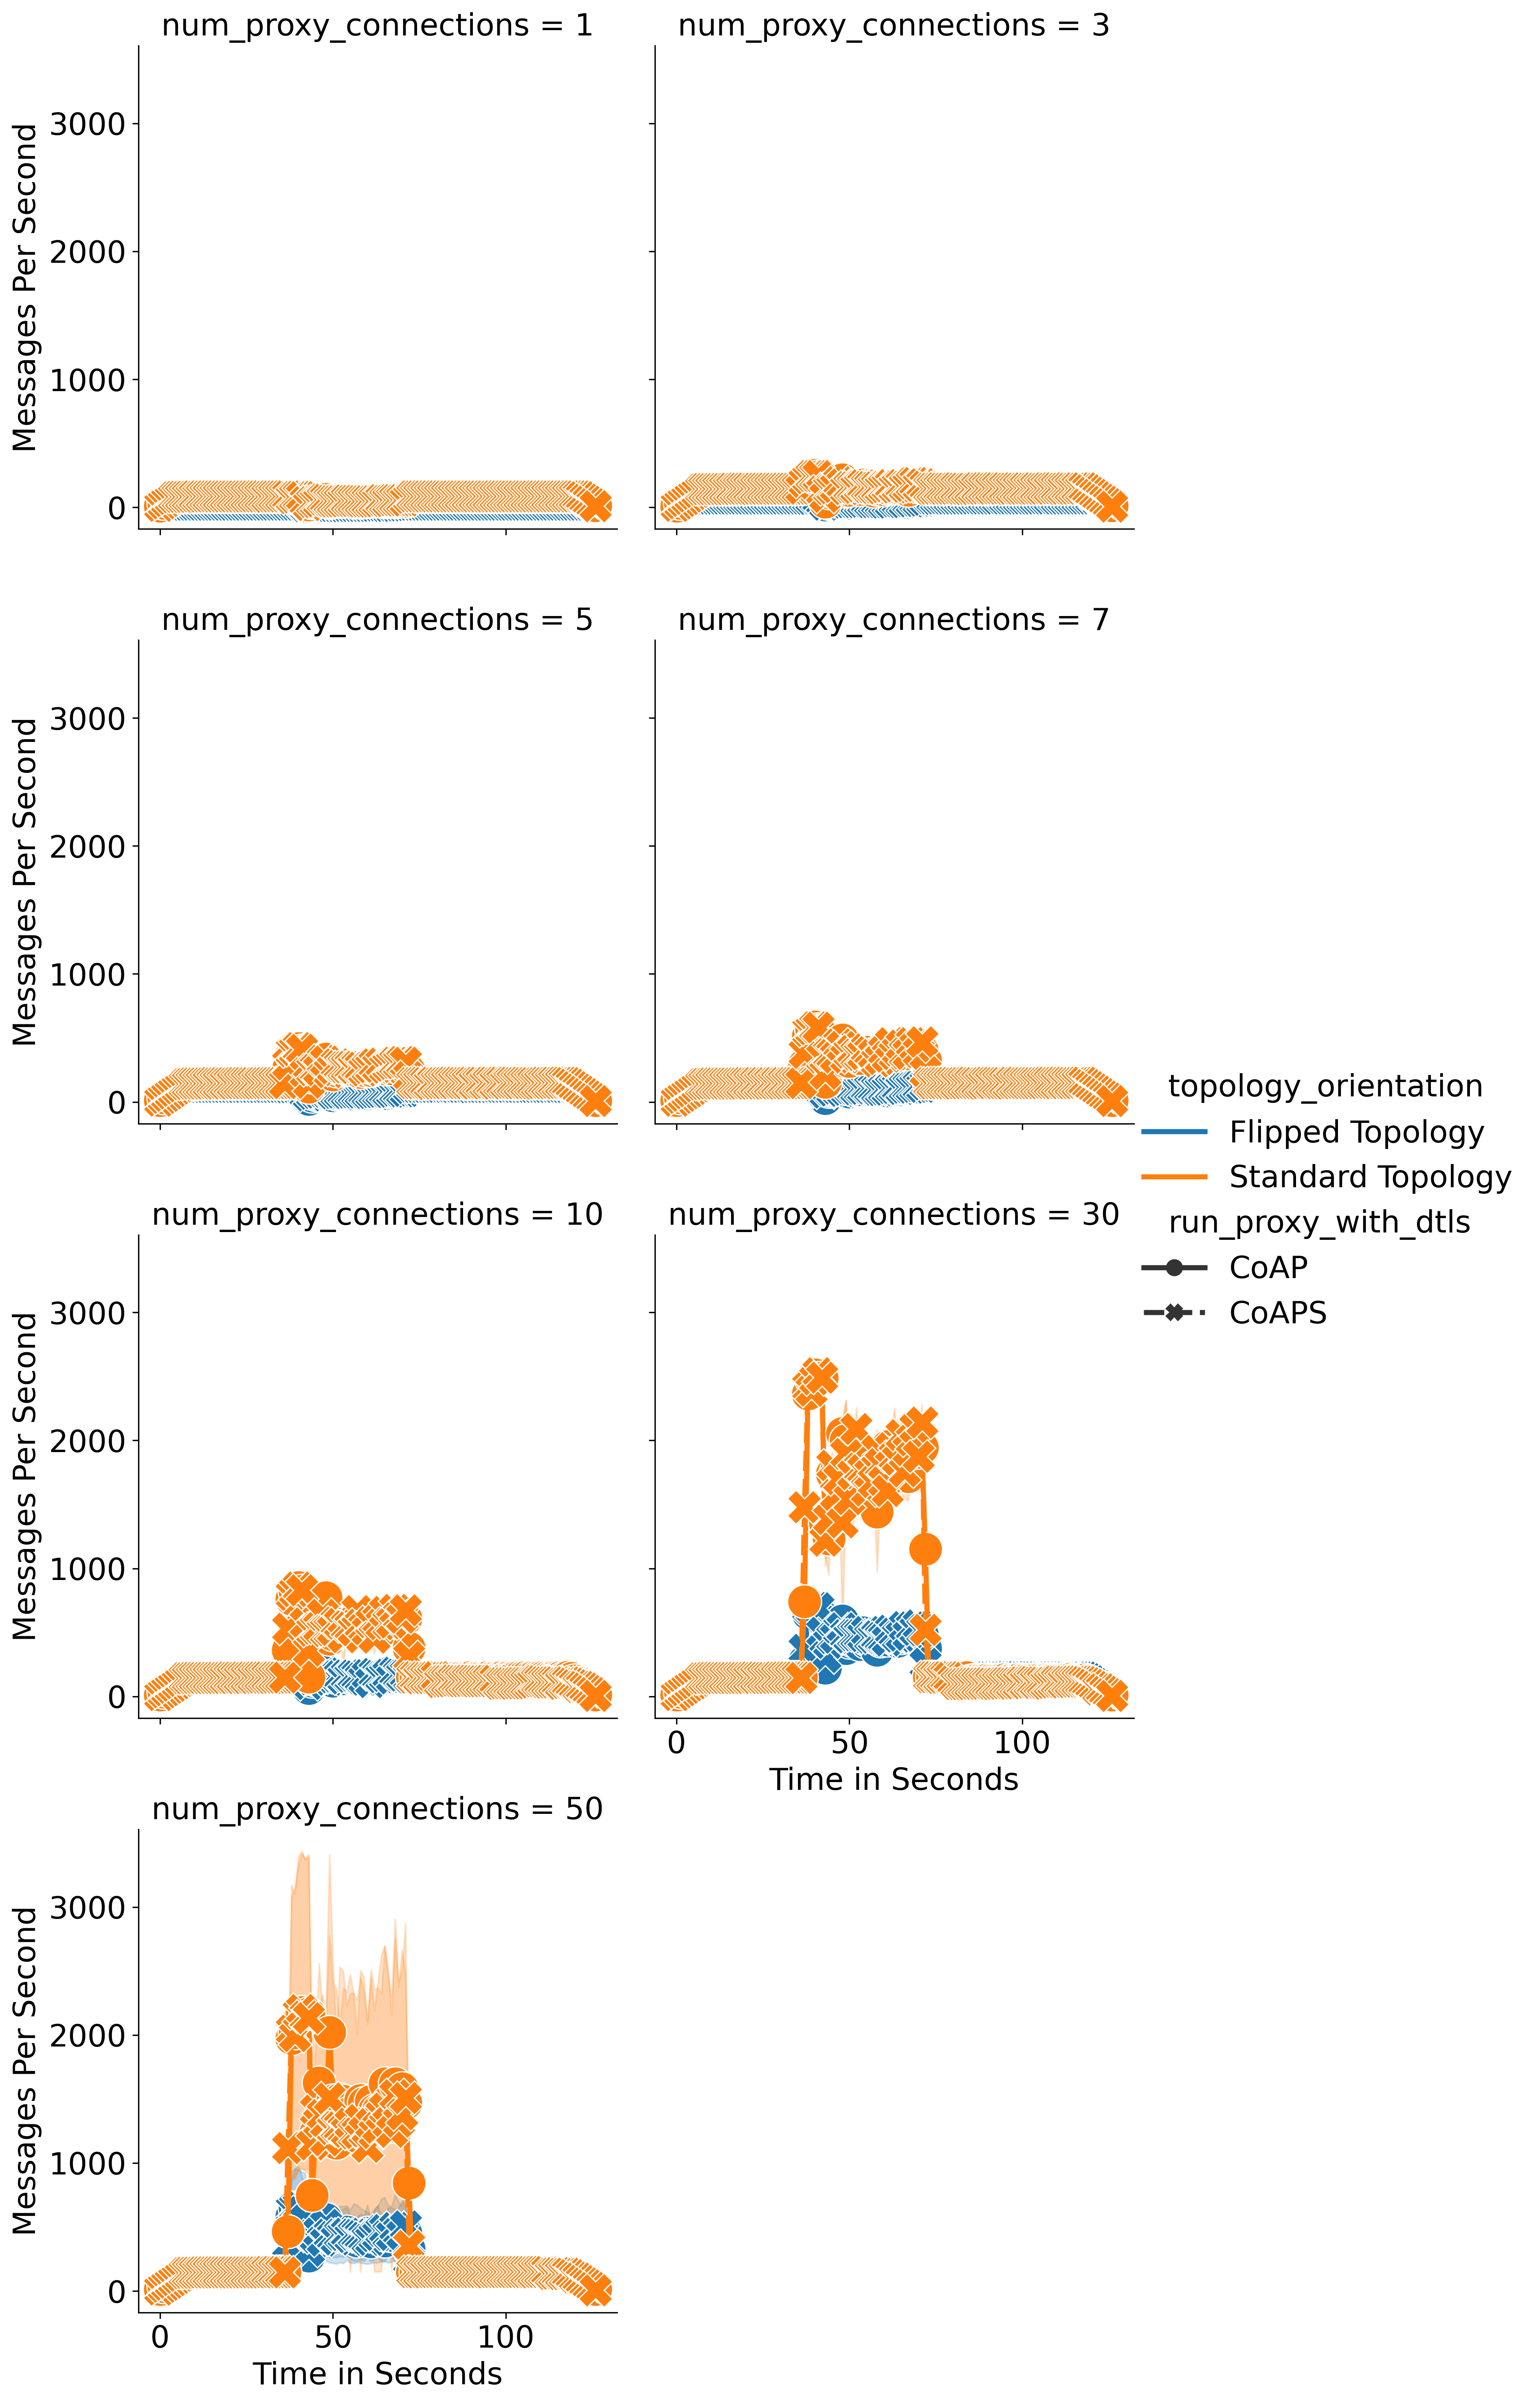

CPU times: user 1min 43s, sys: 199 ms, total: 1min 43s
Wall time: 1min 43s


In [ ]:
%%time

g = sns.relplot(
  data=filtered_binned_messages_df,
  kind="line",
  x="timestamp_bin",
  y="num_messages",
  hue="topology_orientation",
  style="run_proxy_with_dtls",
  col="num_proxy_connections",
  col_wrap=2,
  markers=True,
  markersize=20,
)
g.set_ylabels("Messages Per Second")
g.set_xlabels("Time in Seconds")

plt.show()

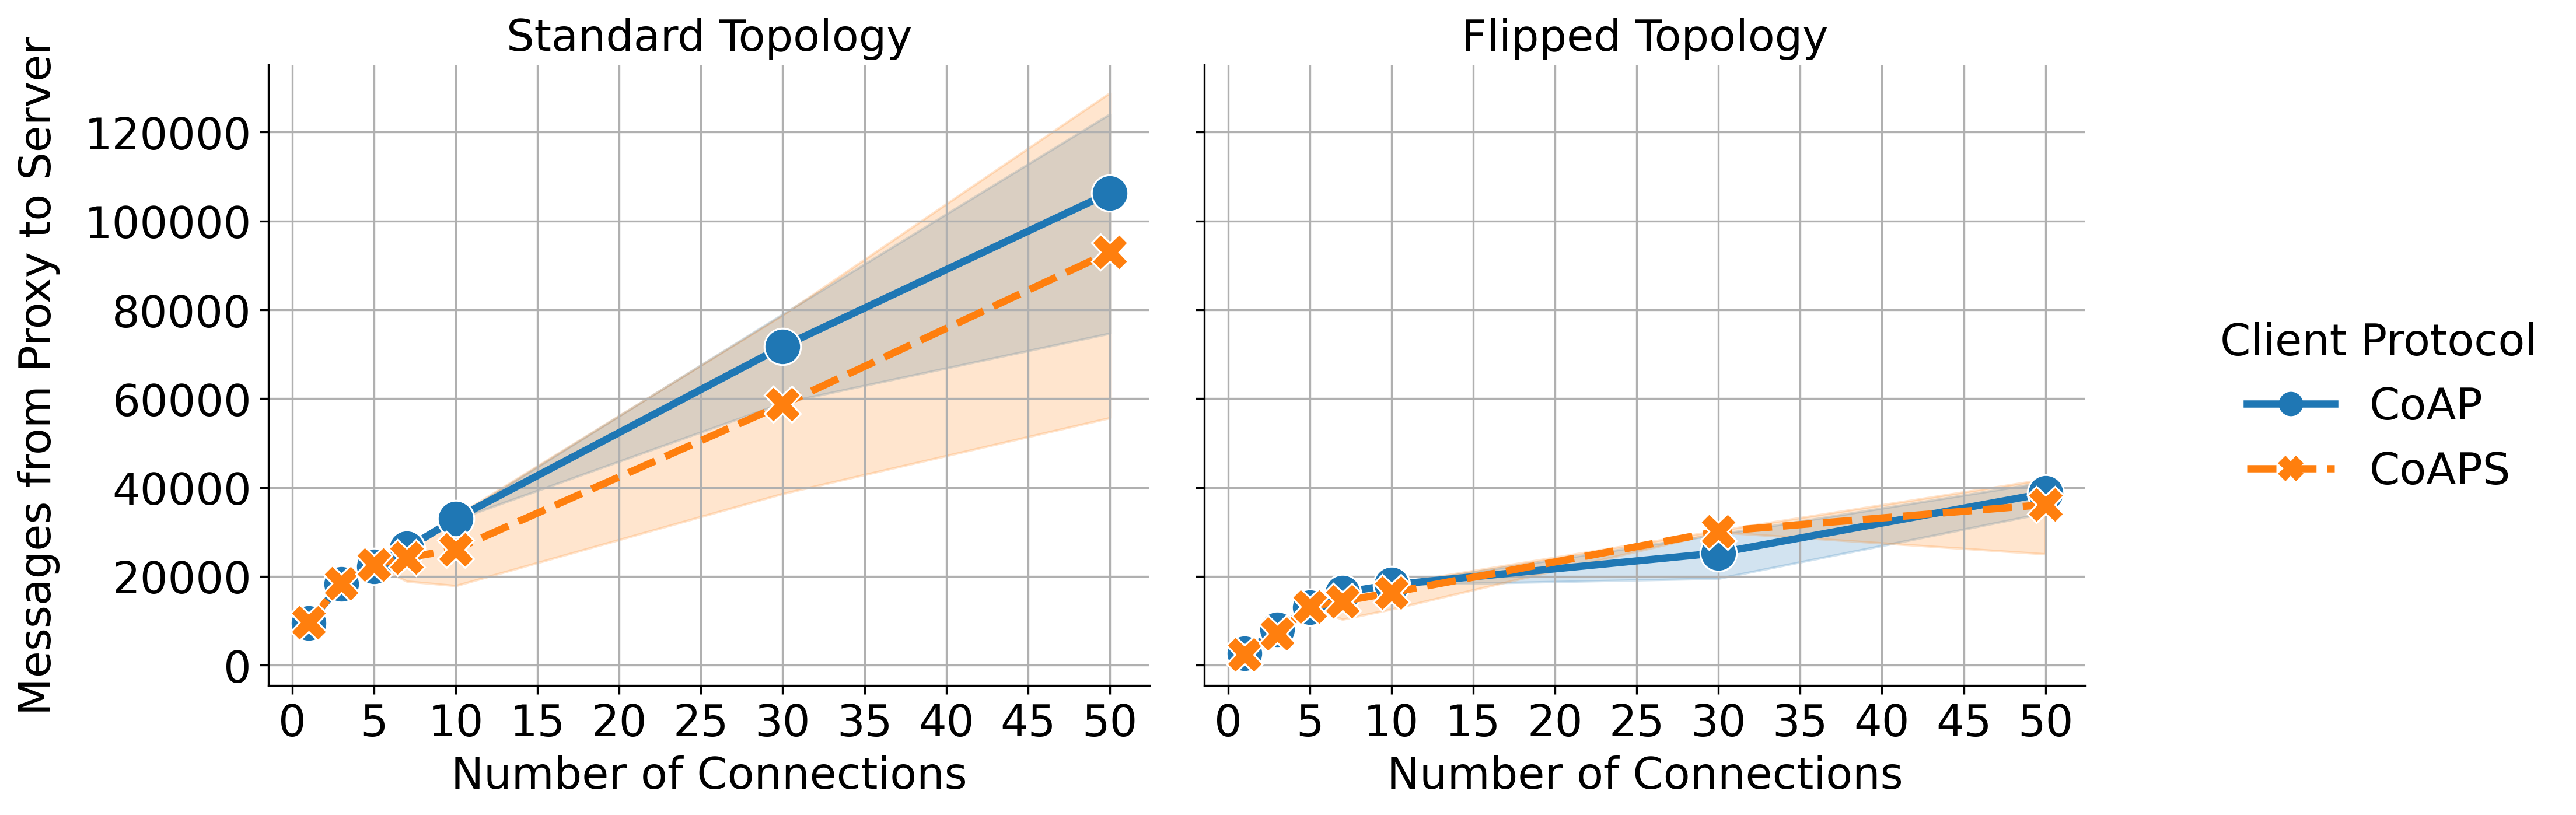

CPU times: user 2.4 s, sys: 217 ms, total: 2.61 s
Wall time: 2.29 s


exp_id  \
0    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
1    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
2    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
3    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
4    thesis_group_controlling_proxy_heap_size_8clients_withattacker_8000MBheap_1proxyconns_coap_https   
..                                                                                                ...   
145                                            thesis_group_topology_8clients_withattacker_dtls_https   
146                                            thesis_group_topology_8clients_withattacker_dtls_https   
147                                            thesis_group_topology_8clients_withattacker_dtls_https   
148                                            thesis_group_topology_8clients_withattacker_dtls_https   
149                                            thesis_group_topology_8clients_withattacker_dtls_https   

     trial topology_orientation  num_proxy_connections run_proxy_with_dtls  \
0        1    Standard Topology                      1                CoAP   
1        2    Standard Topology                      1                CoAP   
2        3    Standard Topology                      1                CoAP   
3        4    Standard Topology                      1                CoAP   
4        5    Standard Topology                      1                CoAP   
..     ...                  ...                    ...                 ...   
145      1     Flipped Topology                     50               CoAPS   
146      2     Flipped Topology                     50               CoAPS   
147      3     Flipped Topology                     50               CoAPS   
148      4     Flipped Topology                     50               CoAPS   
149      5     Flipped Topology                     50               CoAPS   

    communication_pattern   run_attacker  num_messages  
0     proxy->originserver  With Attacker          9495  
1     proxy->originserver  With Attacker          9483  
2     proxy->originserver  With Attacker          9418  
3     proxy->originserver  With Attacker          9500  
4     proxy->originserver  With Attacker          9540  
..                    ...            ...           ...  
145   proxy->originserver  With Attacker         41457  
146   proxy->originserver  With Attacker         41324  
147   proxy->originserver  With Attacker         14086  
148   proxy->originserver  With Attacker         41913  
149   proxy->originserver  With Attacker         42005  

[140 rows x 8 columns]

In [58]:
%%time

df = (
  filtered_binned_messages_df
  .groupby(
    by=["exp_id", "trial", "topology_orientation", "num_proxy_connections", "run_proxy_with_dtls", "communication_pattern", "run_attacker"]
  )
  .agg(
    num_messages=("num_messages", "sum")
  )
  .reset_index()
)

df = df[df["run_attacker"] == "With Attacker"]

connections = df["num_proxy_connections"].unique()

g = sns.relplot(
  data=df,
  kind="line",
  x="num_proxy_connections",
  y="num_messages",
  hue="run_proxy_with_dtls",
  style="run_proxy_with_dtls",
  col="topology_orientation",
  col_order=["Standard Topology", "Flipped Topology"],
  aspect=1.25,
  facet_kws={
    "sharey": True,
    "sharex": True,
  },
  markers=True,
  markersize=15,
)

g.legend.set_title("Client Protocol")
g.set_ylabels("Messages from Proxy to Server", labelpad=10)
g.set_xlabels("Number of Connections")
g.set_titles(
  template="{col_name}",
)

g.set(
  xticks=np.arange(0,51,5),
)

axes = [ g.axes[0, i] for i in range(len(df["topology_orientation"].unique())) ]
for ax in axes:
  ax.grid(True, axis="both")
  for container in ax.containers:
    ax.bar_label(container, fmt="%d", padding=5)

plt.show()

df